<table style="width: 100%; height:auto; border-collapse: collapse;">
  <tr>
    <td style="width: 40%; text-align: left;">
      <img src="https://github.com/diegoa-rodriguezc/ciencia-datos/blob/main/parcial-001/img/uni_facultad.png?raw=true" alt="Logo de la Universidad" style="width: 400px; height: auto;">
    </td>
    <td style="width: 30%; text-align: center; font-size: 18px;">
      <strong>Diego Alberto Rodríguez Cruz</strong>
    </td>
    <td style="width: 40%; text-align: right; font-size: 18px;">
        <strong>
      MINE-4101: Ciencia de Datos Aplicada<br>
      Parcial 002
        </strong>
    </td>
  </tr>
</table>


# Parcial 2

## Contexto: Clínica de los Alpes

La Clínica de los Alpes es una IPS colombiana con varios años de operación en la capital. Esta institución posee varias unidades de cuidado especializado para pacientes con diferentes tipos de patologías y necesidades de atención.

Sin embargo, al igual que muchas entidades de las mismas características, uno de los mayores problemas que enfrenta la Clínica es el de los reingresos médicos. Un reingreso médico ocurre cuando un paciente que se ha dado de alta debe ser nuevamente admitido por complicaciones relacionadas con su ingreso original en plazos de 30 días, 90 días o hasta un año, de acuerdo con las definiciones de la OMS.

Los reingresos son problemáticos porque aumentan la carga financiera sobre la clínica, añadiendo costos acumulativos de cuidado, bloqueando el uso eficiente de recursos para atender a otros pacientes, generando en sobrecostos para las facturas médicas que deben pagar los pacientes, causando impactos físicos y emocionales; y en últimas ocasionando pérdida de confianza en la institución de salud.

Por esta razón la Clínica de los Alpes ha financiado un proyecto de Inteligencia Artificial con el propósito de detectar cuando un paciente que está a punto de ser dado de alta tiene un riesgo considerable de reingreso y por lo tanto requiere atención adicional. En la fase inicial del desarrollo de una herramienta de detección de riesgos de reingresos, la clínica ha decidido concentrarse en los pacientes con diabetes, una de las condiciones de salud de pacientes que se ve asociada con un mayor riesgo a ser reingresado por complicaciones. El equipo de desarrollo ha decidido emplear un conjunto de datos de pacientes con esta enfermedad.

### Diccionario de datos

El diccionario de datos se puede descargar del siguiente enlace:<br/>
[Descargar Diccionario de datos](./doc/Data_dictionary.xlsx)


## Puntos
* **[Punto 1](#Punto-1):**

* ![Diagrama de bloques](https://github.com/diegoa-rodriguezc/ciencia-datos/blob/main/parcial-001/img/?.png?raw=true)


## Librerías

In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import ast

import cv2
import os
import requests
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
import sys
import random


In [2]:
# configuración
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_colwidth', 128)
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimales
pd.set_option('expand_frame_repr', False)
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# Establecer la semilla general
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

## Punto 1
([Volver al Inicio](#Puntos))

In [15]:
diabetes_df = pd.read_csv('./data/diabetes_data_complete.csv', encoding='utf-8', delimiter=',')

In [17]:
# dimension datset
print(f'Dimensiones del dataset : {diabetes_df.shape[0]} registros, {diabetes_df.shape[1]} columnas')

Dimensiones del dataset : 100241 registros, 44 columnas


In [19]:
# tipos de datos
diabetes_df.dtypes

Unnamed: 0                   int64
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [21]:
# Visualización de datos
diabetes_df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
1,2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
2,3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
3,4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [23]:
# Revisón de campos vacíos/nulos
nulos_y_tipos = pd.DataFrame({
    'nulos': diabetes_df.isnull().sum(),
    'tipo_dato': diabetes_df.dtypes
})
nulos_y_tipos

,nulos,tipo_dato
Unnamed: 0,0,int64
encounter_id,0,int64
patient_nbr,0,int64
race,0,object
gender,0,object
age,0,object
admission_type_id,0,int64
discharge_disposition_id,0,int64
admission_source_id,0,int64
time_in_hospital,0,int64


In [25]:
# Estadisticas del dataset
diabetes_df.describe(include='all')

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,100241.00,100241.00,100241.00,100241,100241,100241,100241.00,100241.00,100241.00,100241.00,100241.00,100241.00,100241.00,100241.00,100241.00,100241.00,100241,100241,100241,100241.00,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241,100241
unique,NaN,NaN,NaN,5,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715,743,789,NaN,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,4,4,2,2,2,2,2,2,3
top,NaN,NaN,NaN,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428,428,250,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,NaN,75079,53922,25896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6853,6657,11533,NaN,80541,98708,99543,100157,95101,100240,87680,89716,100218,92997,93939,99936,100204,100238,100204,46799,99546,100228,100240,100239,100240,53891,77153,53818
mean,51137.19,166016384.09,54628958.07,NaN,NaN,NaN,2.02,3.73,5.76,4.42,43.17,1.35,16.12,0.37,0.20,0.64,NaN,NaN,NaN,7.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29347.33,102676318.13,38694745.94,NaN,NaN,NaN,1.44,5.28,4.06,2.99,19.69,1.71,8.12,1.27,0.93,1.26,NaN,NaN,NaN,1.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,12522.00,135.00,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25735.00,85566204.00,23460894.00,NaN,NaN,NaN,1.00,1.00,1.00,2.00,32.00,0.00,11.00,0.00,0.00,0.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,51264.00,153048924.00,46049076.00,NaN,NaN,NaN,1.00,1.00,7.00,4.00,44.00,1.00,15.00,0.00,0.00,0.00,NaN,NaN,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,76557.00,231062436.00,87785298.00,NaN,NaN,NaN,3.00,4.00,7.00,6.00,57.00,2.00,20.00,0.00,0.00,1.00,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


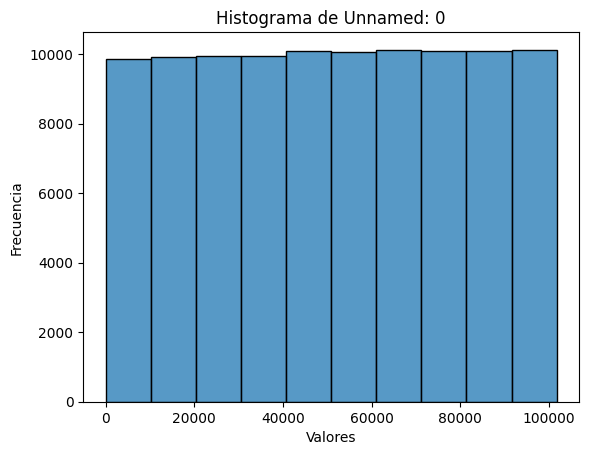

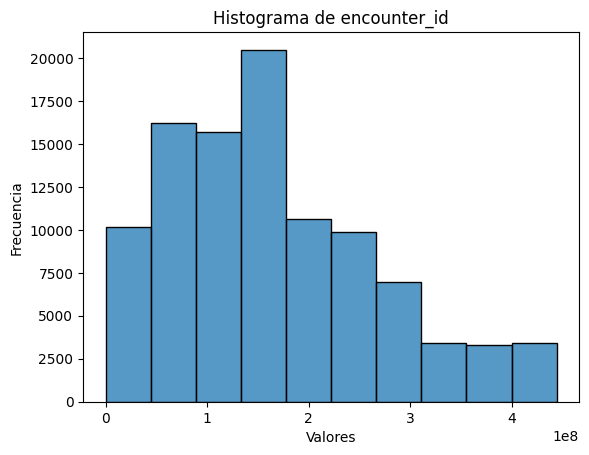

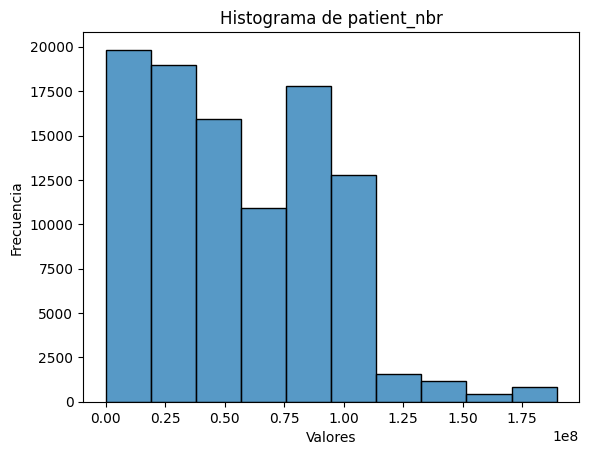

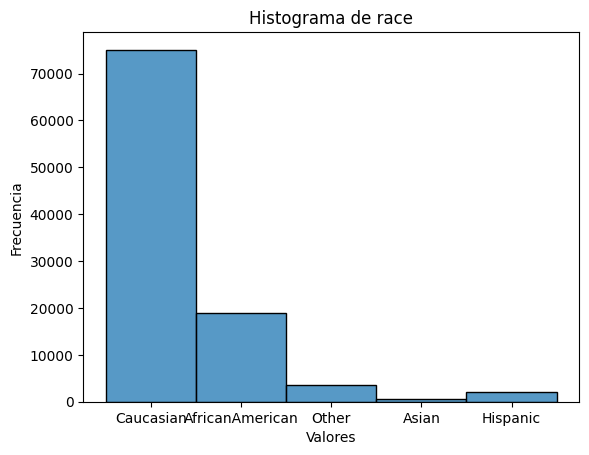

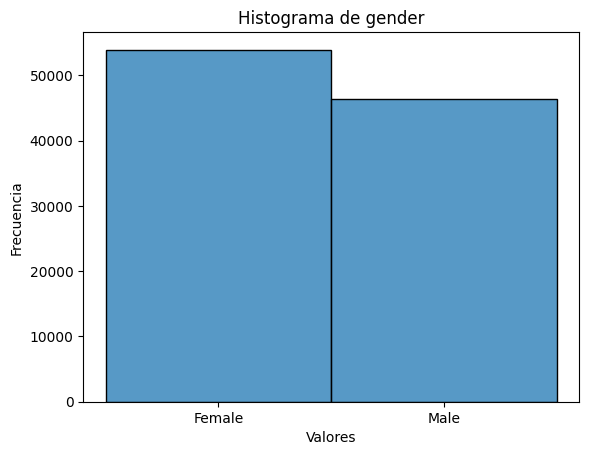

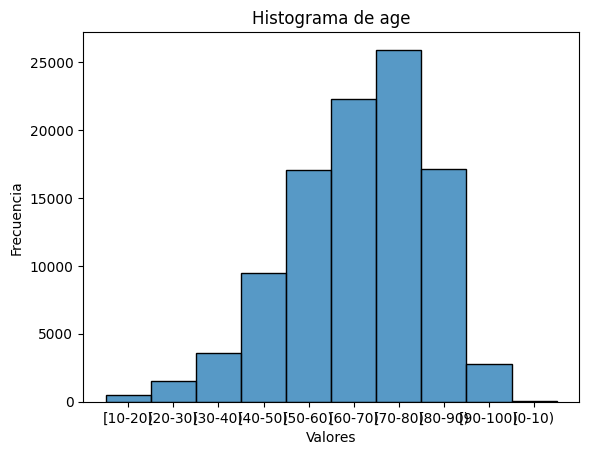

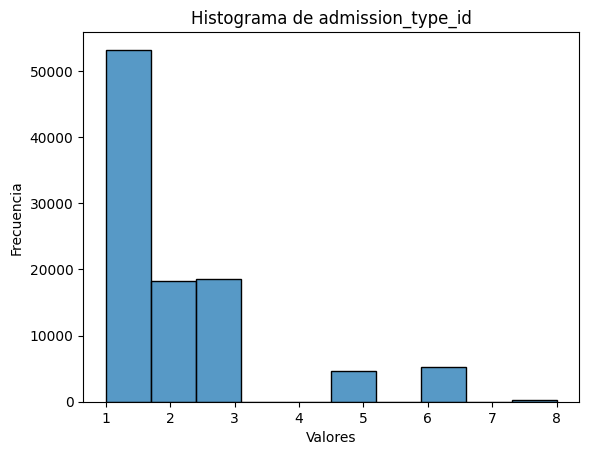

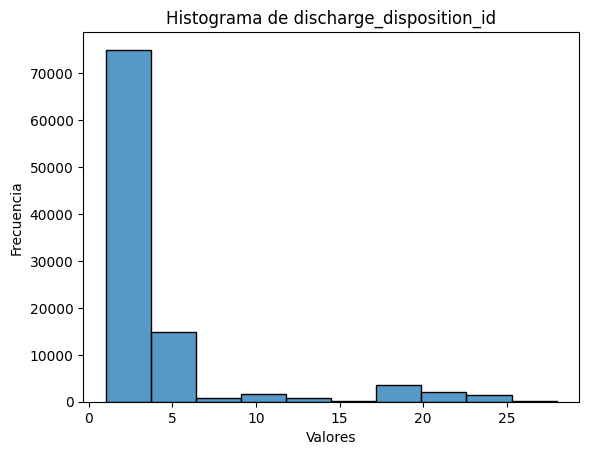

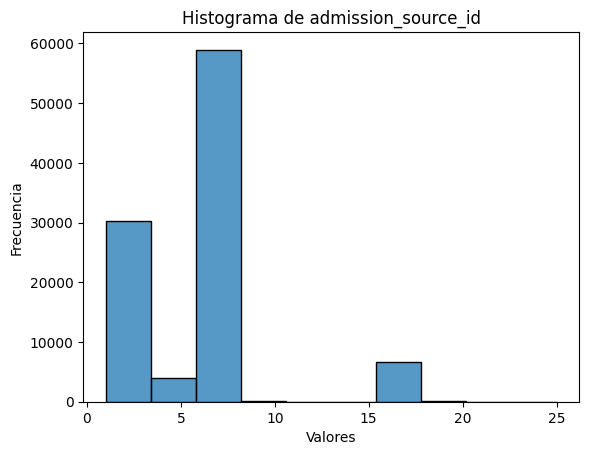

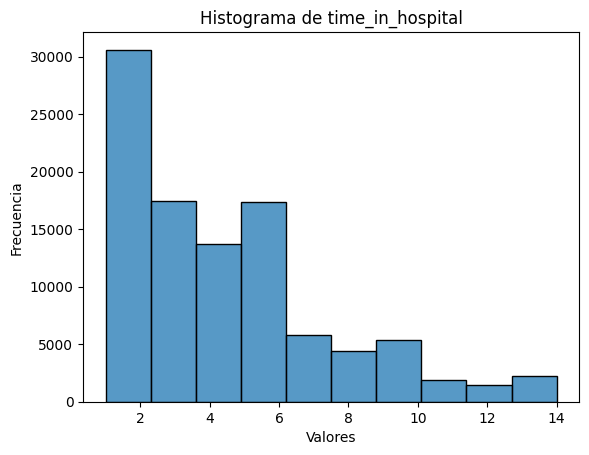

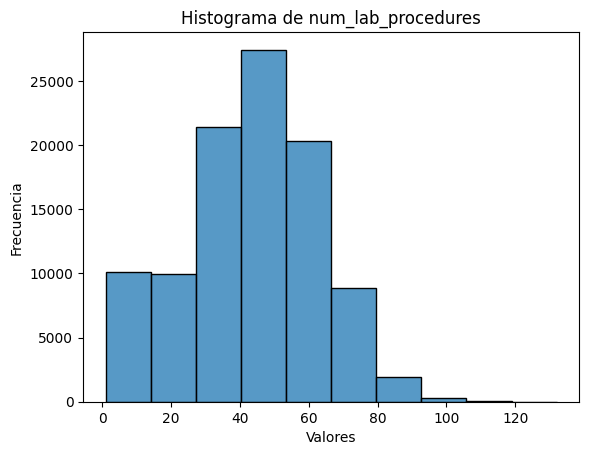

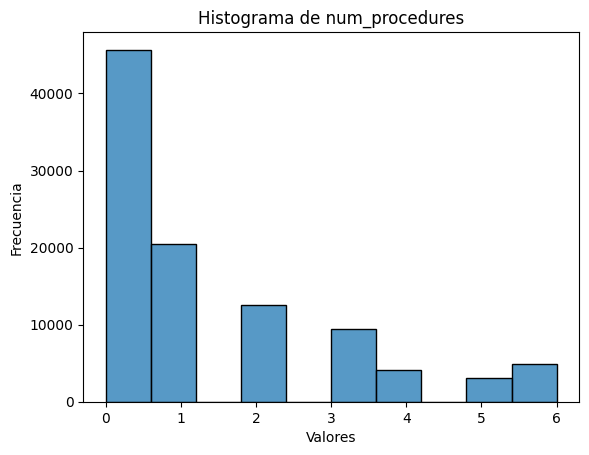

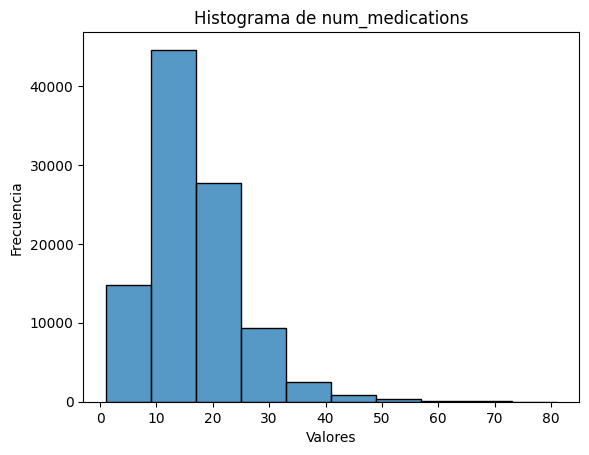

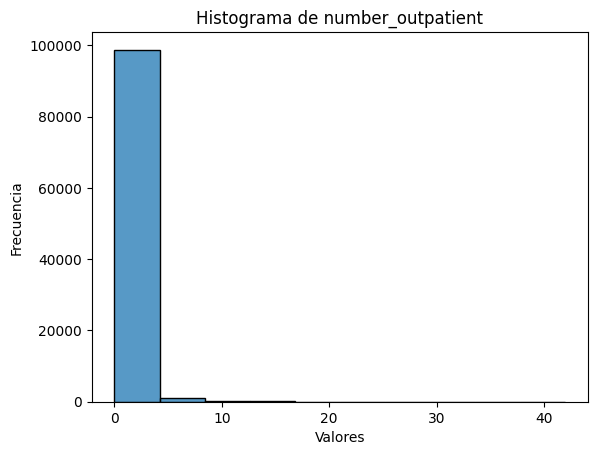

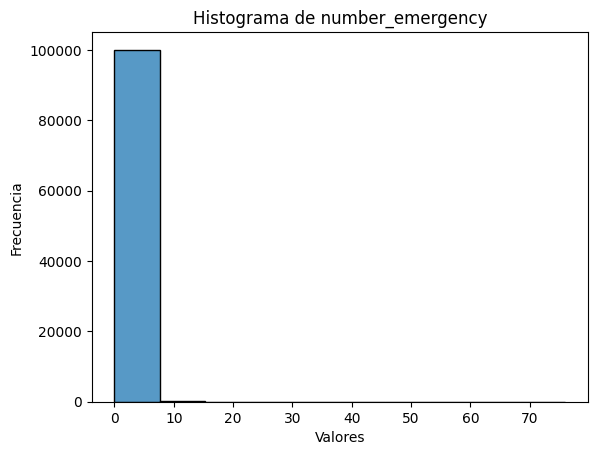

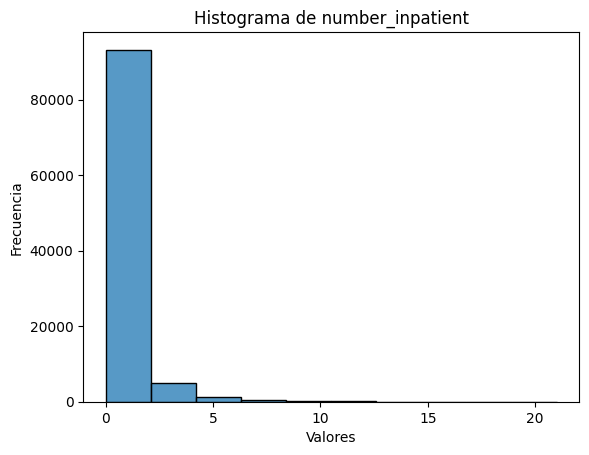

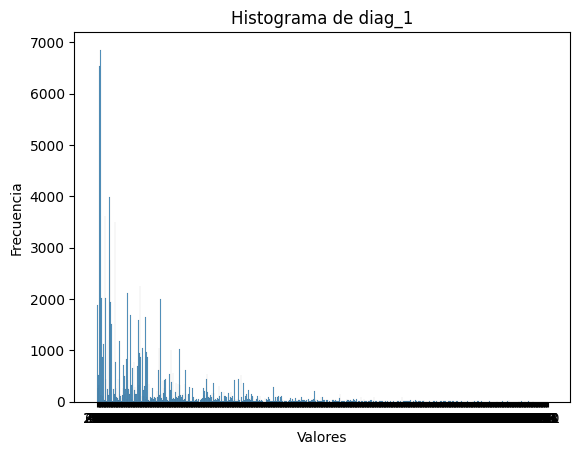

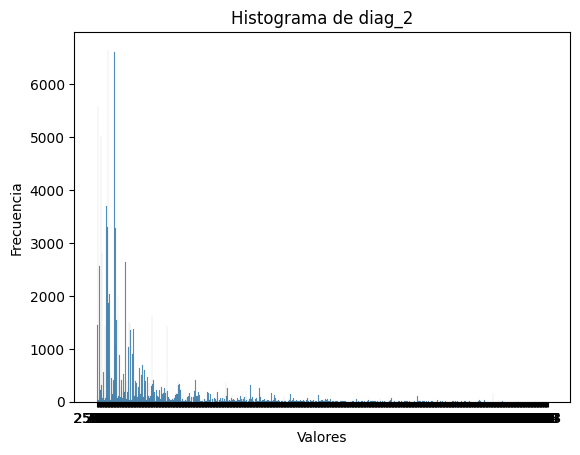

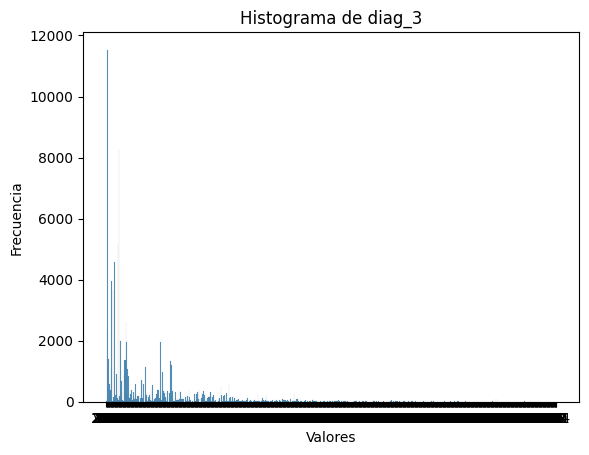

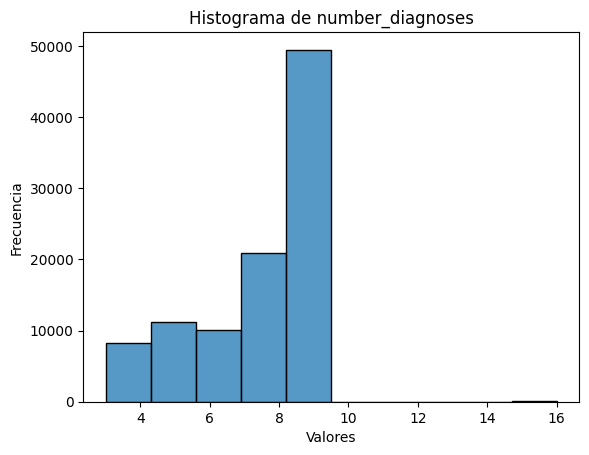

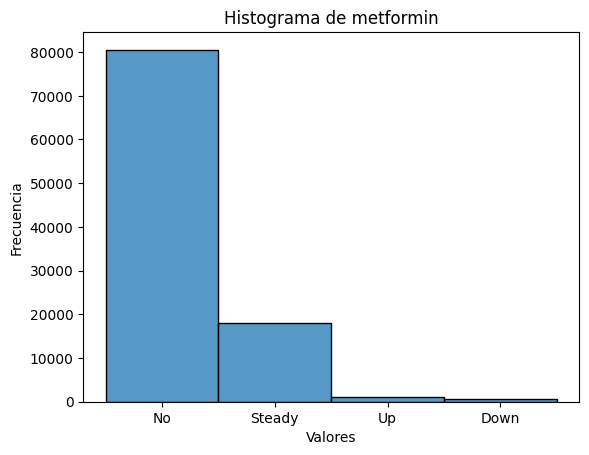

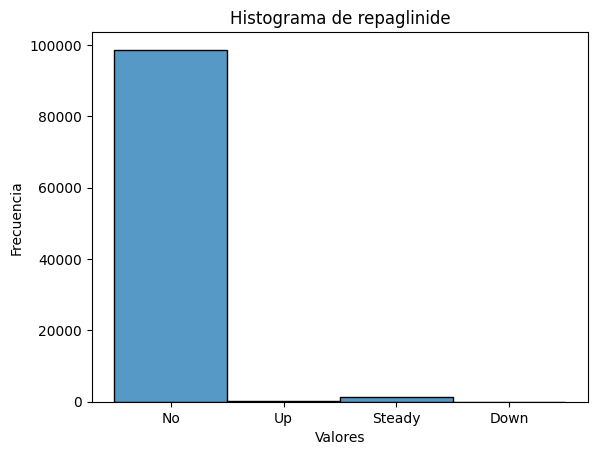

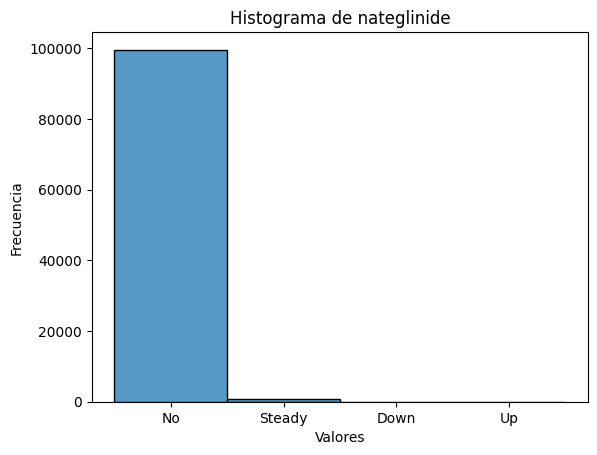

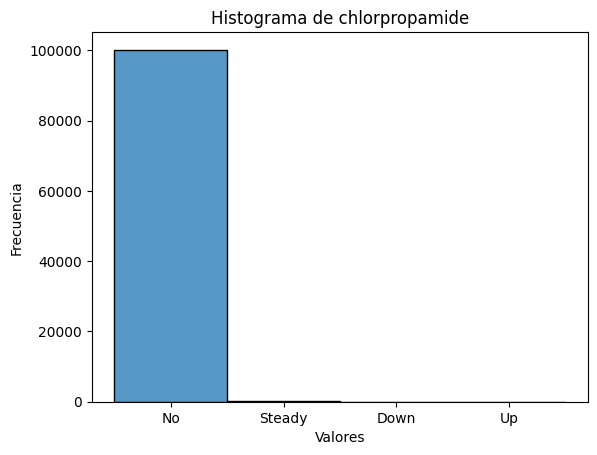

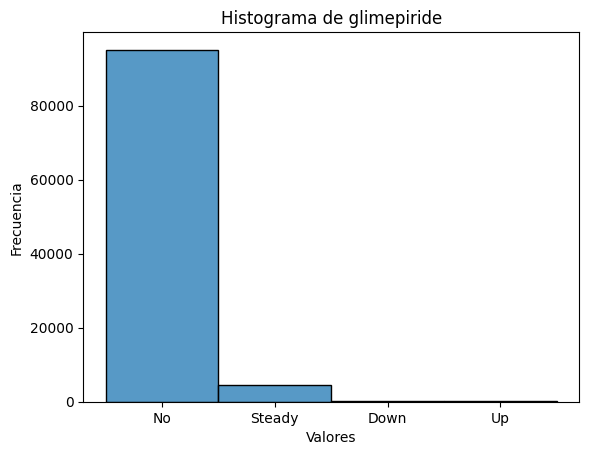

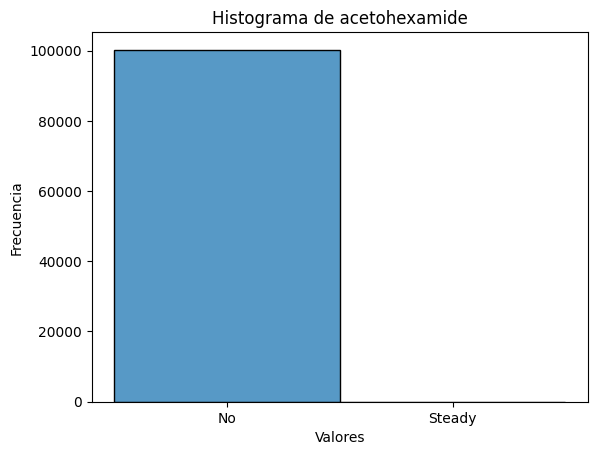

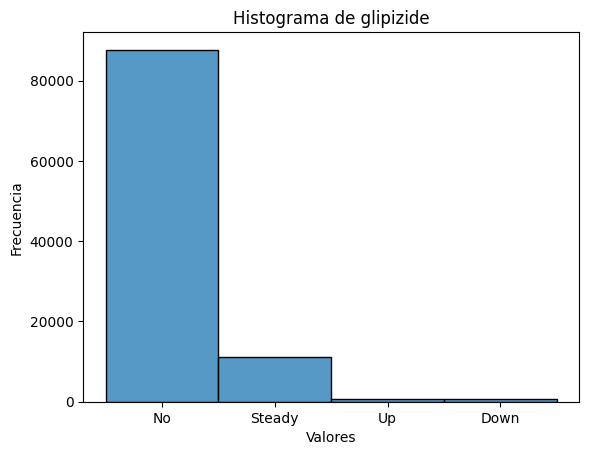

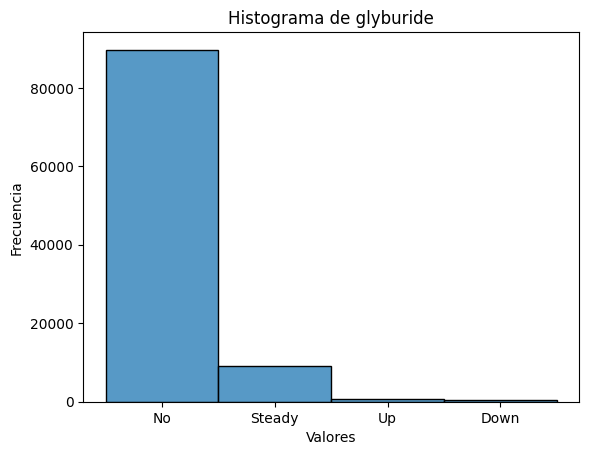

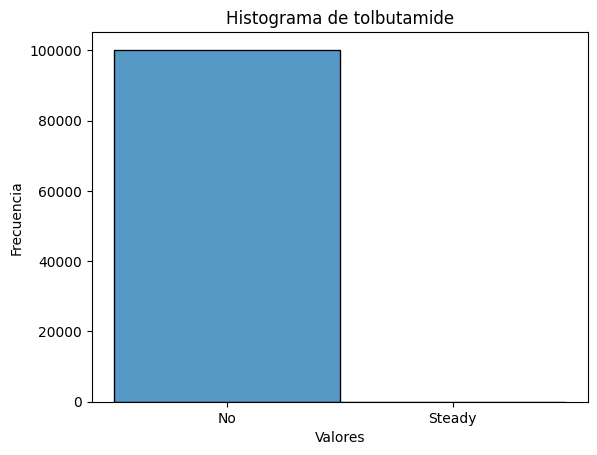

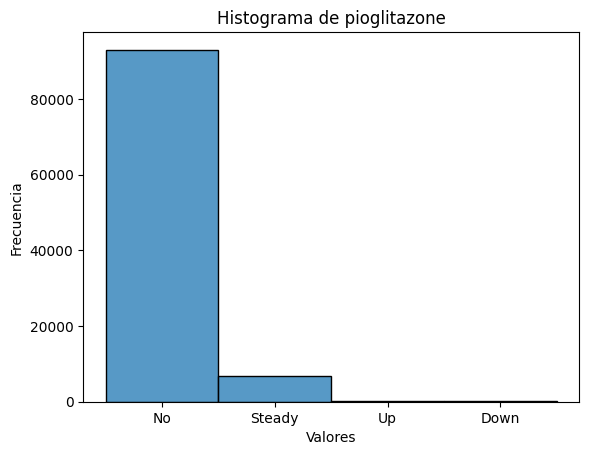

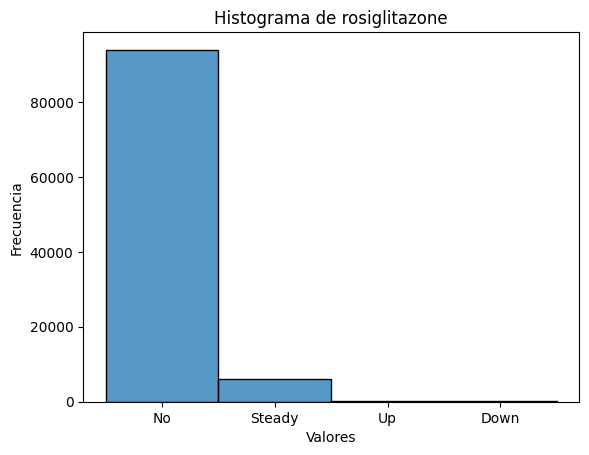

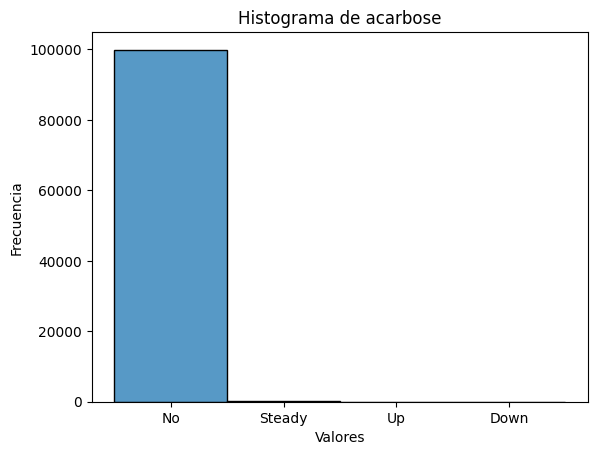

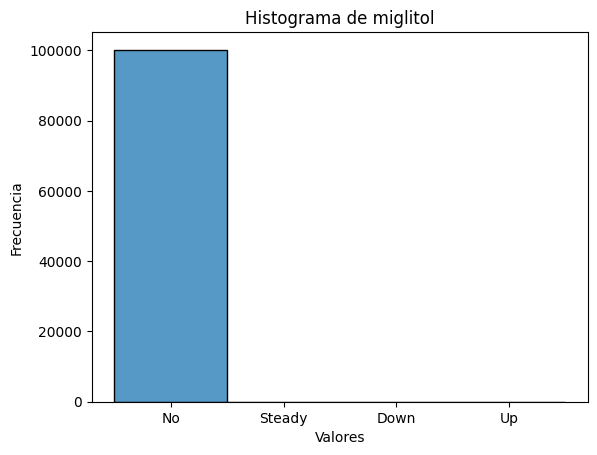

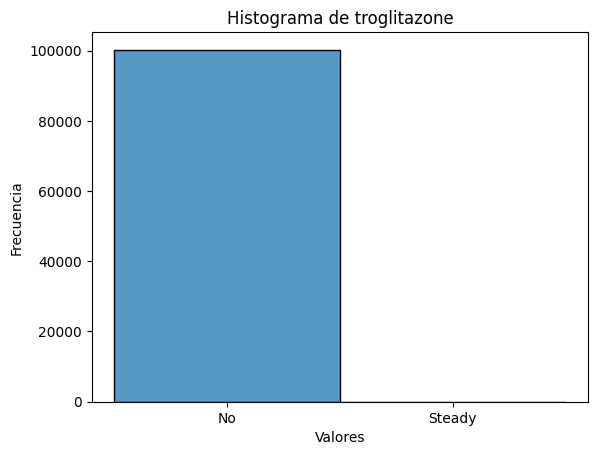

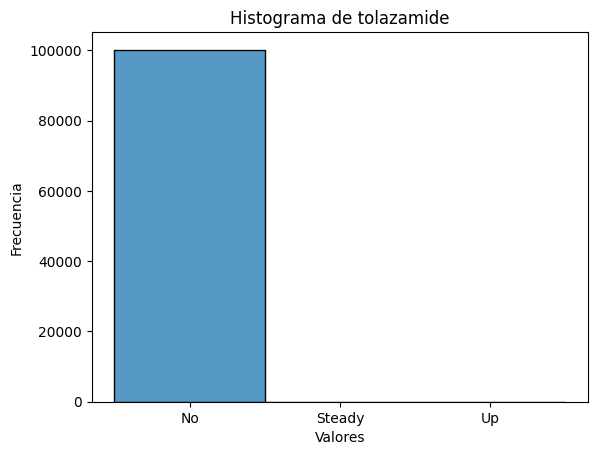

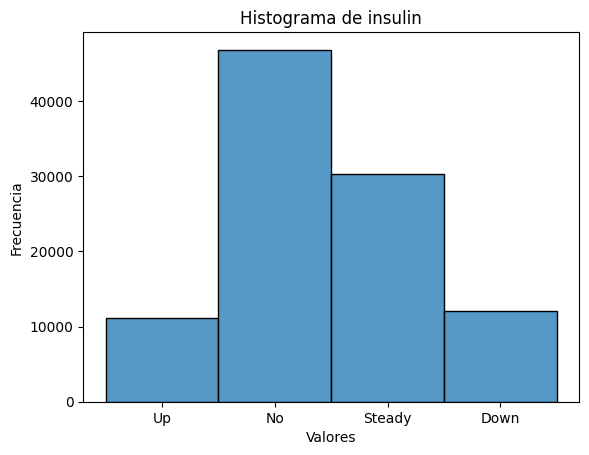

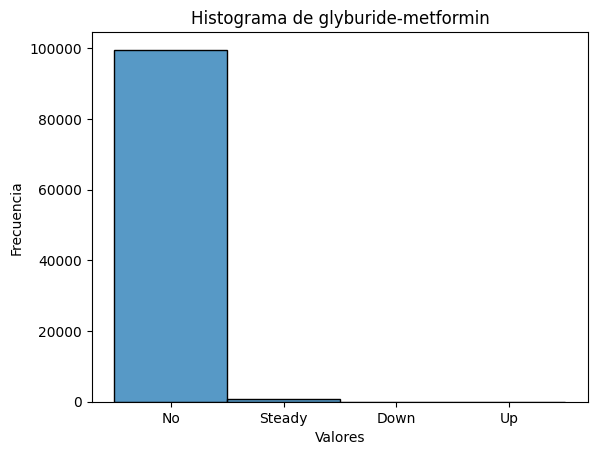

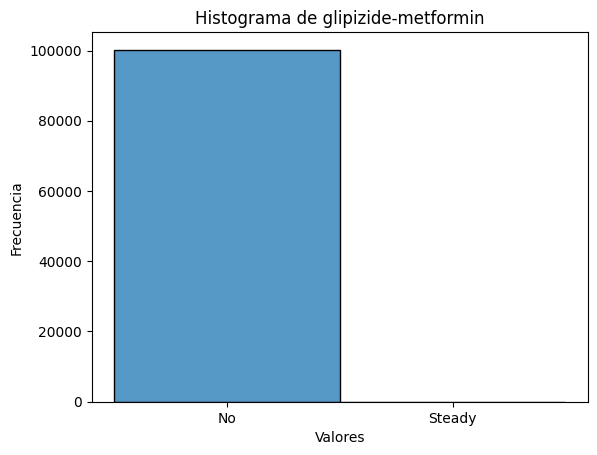

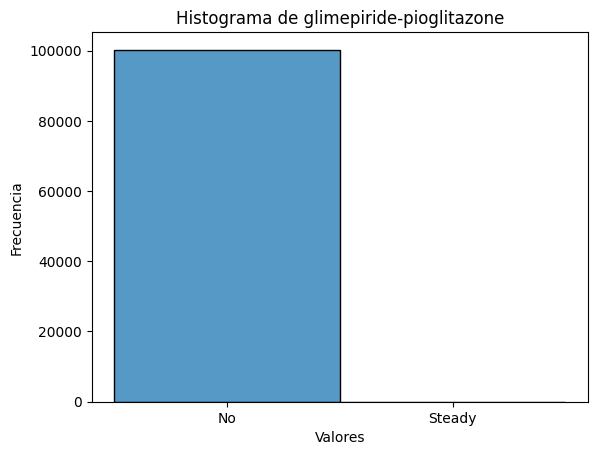

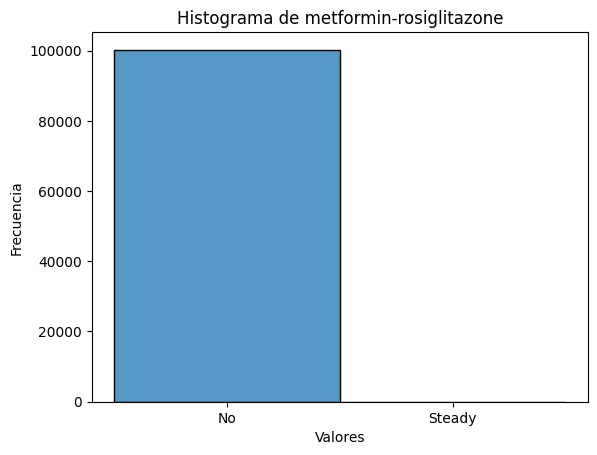

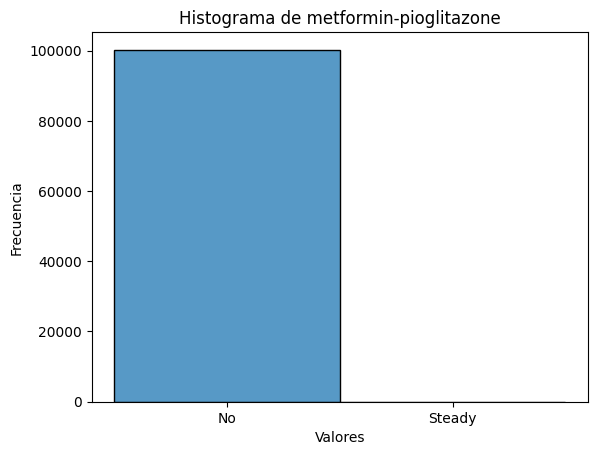

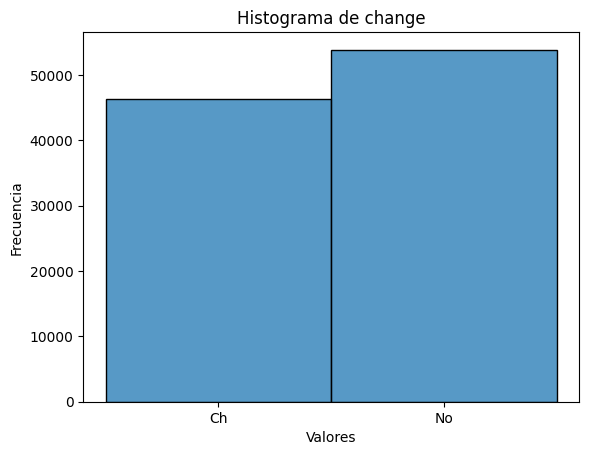

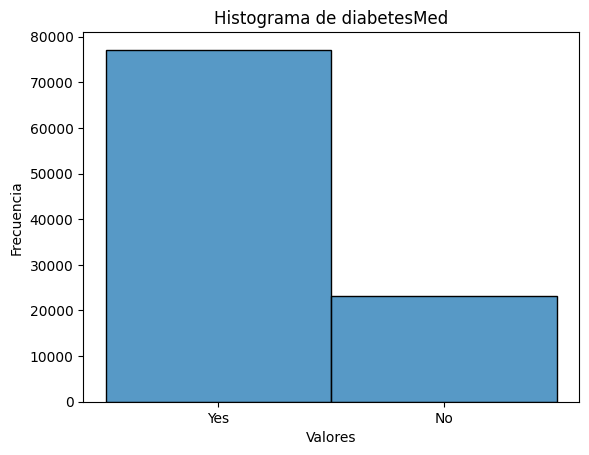

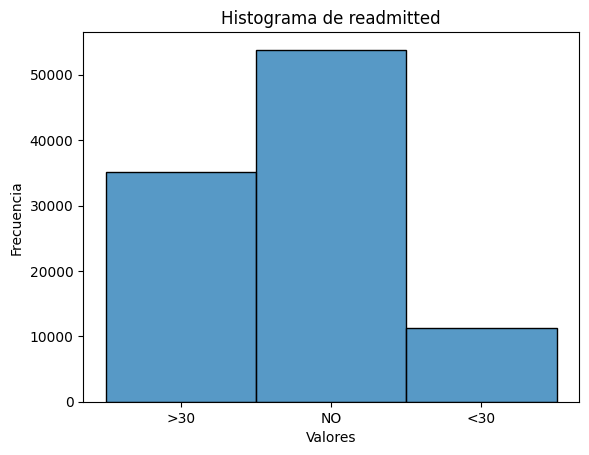

In [60]:
columnas = diabetes_df.columns

for columna in columnas:
    plt.figure() 
    sns.histplot(diabetes_df[columna], bins=10, kde=False)  
    plt.xlabel('Valores')  
    plt.ylabel('Frecuencia')  
    plt.title(f'Histograma de {columna}')  
plt.show()

In [72]:
"""
columnas = diabetes_df.columns

for columna in columnas:
    plt.figure(figsize=(10, 8)) 
    sns.boxplot(y=diabetes_df[columna])  
    plt.ylabel(columna)  
    plt.title(f'Diagrama de Caja de {columna}')  
plt.show()
"""

"\ncolumnas = diabetes_df.columns\n\nfor columna in columnas:\n    plt.figure(figsize=(10, 8)) \n    sns.boxplot(y=diabetes_df[columna])  \n    plt.ylabel(columna)  \n    plt.title(f'Diagrama de Caja de {columna}')  \nplt.show()\n"

In [29]:
# Aplicar One-Hot Encoding
data = pd.get_dummies(diabetes_df, drop_first=True)
data = diabetes_df

In [104]:
"""
Descripción del Problema:

La clínica quiere predecir si un paciente dado de alta tiene un alto riesgo de reingresar dentro de un plazo de 30 días, basado en su información clínica y de tratamiento.
El objetivo es predecir la variable readmitted, que indica si el paciente fue readmitido dentro de 30 días (valor 1) o no (valor 0).
Definición del Problema: Clasificación binaria:

Clase 1: Paciente readmitido en 30 días o menos.
Clase 0: Paciente no readmitido en 30 días.

# Alternativamente, para variables ordinales podrías usar Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['race'] = encoder.fit_transform(data['race'])
"""

"\nDescripción del Problema:\n\nLa clínica quiere predecir si un paciente dado de alta tiene un alto riesgo de reingresar dentro de un plazo de 30 días, basado en su información clínica y de tratamiento.\nEl objetivo es predecir la variable readmitted, que indica si el paciente fue readmitido dentro de 30 días (valor 1) o no (valor 0).\nDefinición del Problema: Clasificación binaria:\n\nClase 1: Paciente readmitido en 30 días o menos.\nClase 0: Paciente no readmitido en 30 días.\n\n# Alternativamente, para variables ordinales podrías usar Label Encoding\nfrom sklearn.preprocessing import LabelEncoder\nencoder = LabelEncoder()\ndata['race'] = encoder.fit_transform(data['race'])\n"

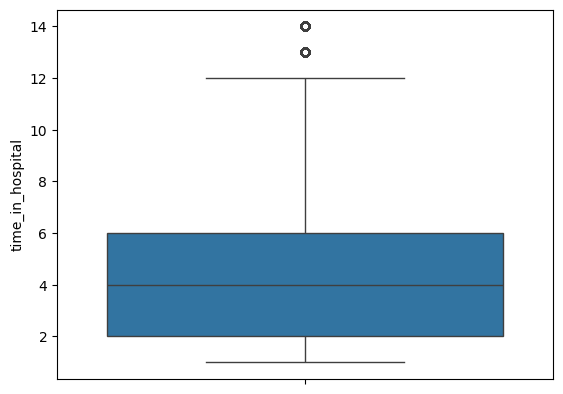

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para detectar outliers
sns.boxplot(data['time_in_hospital'])
plt.show()


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']] = scaler.fit_transform(data[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']])
data['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

In [33]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(['readmitted'], axis=1).select_dtypes(include=['float64', 'int64'])
y = data['readmitted']

# Entrenar un modelo de RandomForest para obtener la importancia de características
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Importancia de las características
importancia = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=["Importancia"])
importancia.sort_values(by="Importancia", ascending=False).head(10)


,Importancia
patient_nbr,0.16
Unnamed: 0,0.14
encounter_id,0.14
num_lab_procedures,0.12
num_medications,0.10
time_in_hospital,0.07
discharge_disposition_id,0.05
num_procedures,0.05
number_diagnoses,0.04
number_inpatient,0.04


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# 1. Modelo Básico: Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)

# Evaluación
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.542679479932165
[[    0   418  2865]
 [    0  1524  9072]
 [    0  1398 14796]]
              precision    recall  f1-score   support

         <30       0.00      0.00      0.00      3283
         >30       0.46      0.14      0.22     10596
          NO       0.55      0.91      0.69     16194

    accuracy                           0.54     30073
   macro avg       0.34      0.35      0.30     30073
weighted avg       0.46      0.54      0.45     30073



In [41]:
# 2. Modelos de Árboles: Random Forest y XGBoost
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Entrenar modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluación
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")
"""
# Entrenar modelo XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluación
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")
"""

Random Forest Accuracy: 0.5930901473082166


'\n# Entrenar modelo XGBoost\nxgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)\nxgb_model.fit(X_train, y_train)\nxgb_pred = xgb_model.predict(X_test)\n\n# Evaluación\nprint(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")\n'

In [54]:
print(np.unique(y_test))
"""
# Asegúrate de tomar solo la probabilidad de la clase positiva (clase 1)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Ahora calcula AUC-ROC correctamente
roc_auc = roc_auc_score(y_test, y_probs)
"""

['<30' '>30' 'NO']


'\n# Asegúrate de tomar solo la probabilidad de la clase positiva (clase 1)\ny_probs = rf_model.predict_proba(X_test)[:, 1]\n\n# Ahora calcula AUC-ROC correctamente\nroc_auc = roc_auc_score(y_test, y_probs)\n'

In [44]:
#EVA
from sklearn.metrics import roc_auc_score, roc_curve

# AUC ROC
y_probs = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


ValueError: multi_class must be in ('ovo', 'ovr')

In [46]:
%%time

#optin
from sklearn.model_selection import GridSearchCV

# Parámetros de búsqueda para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor modelo
print("Mejores parámetros:", grid_search.best_params_)


KeyboardInterrupt: 

### Analisis Univariado
([Volver al Inicio](#Puntos)) | ([Volver al Punto 2](#Punto-2))

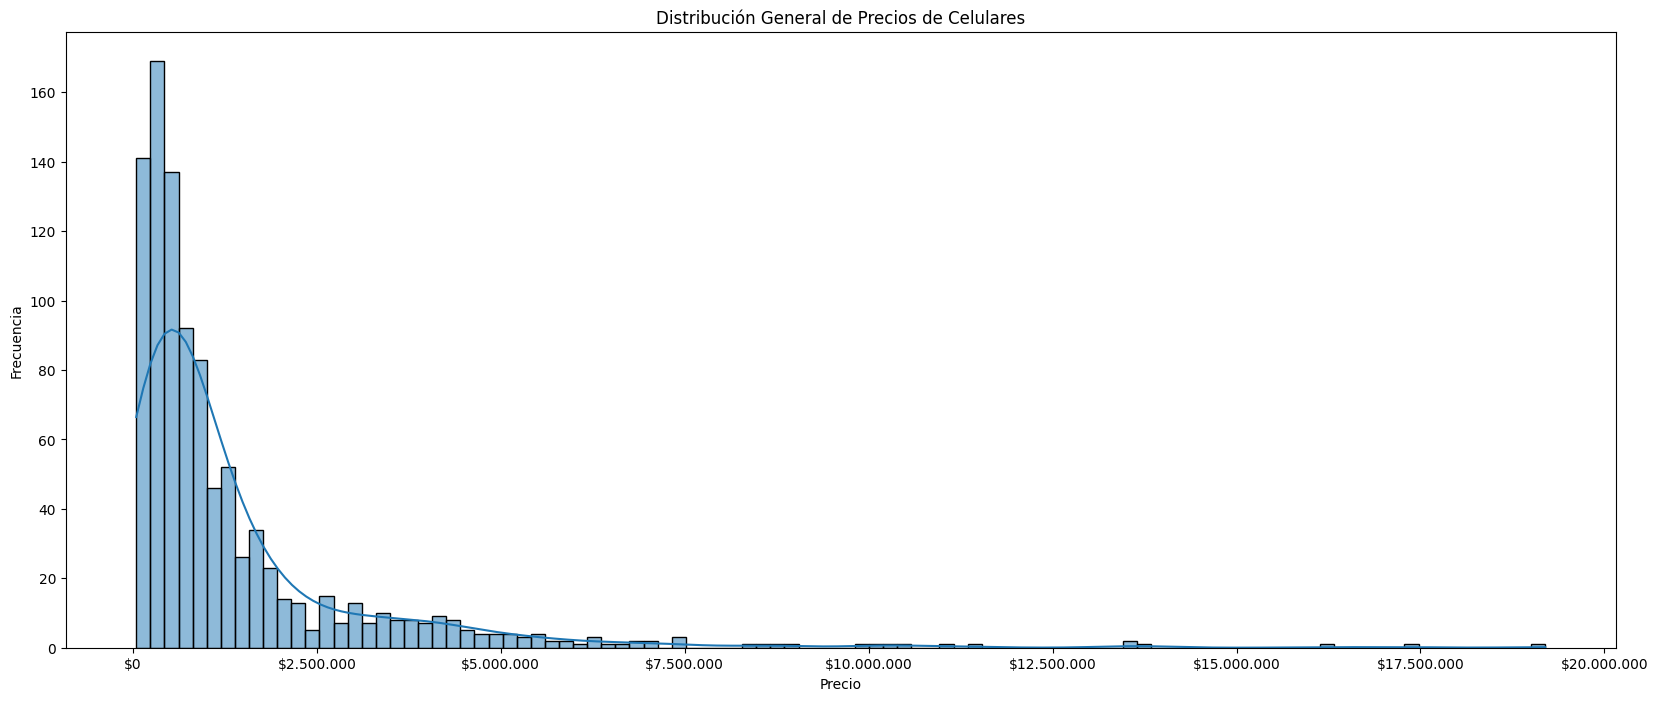

In [69]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['price'], bins=100, kde=True)
plt.title('Distribución General de Precios de Celulares')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'.replace(',', ".")))
plt.show()

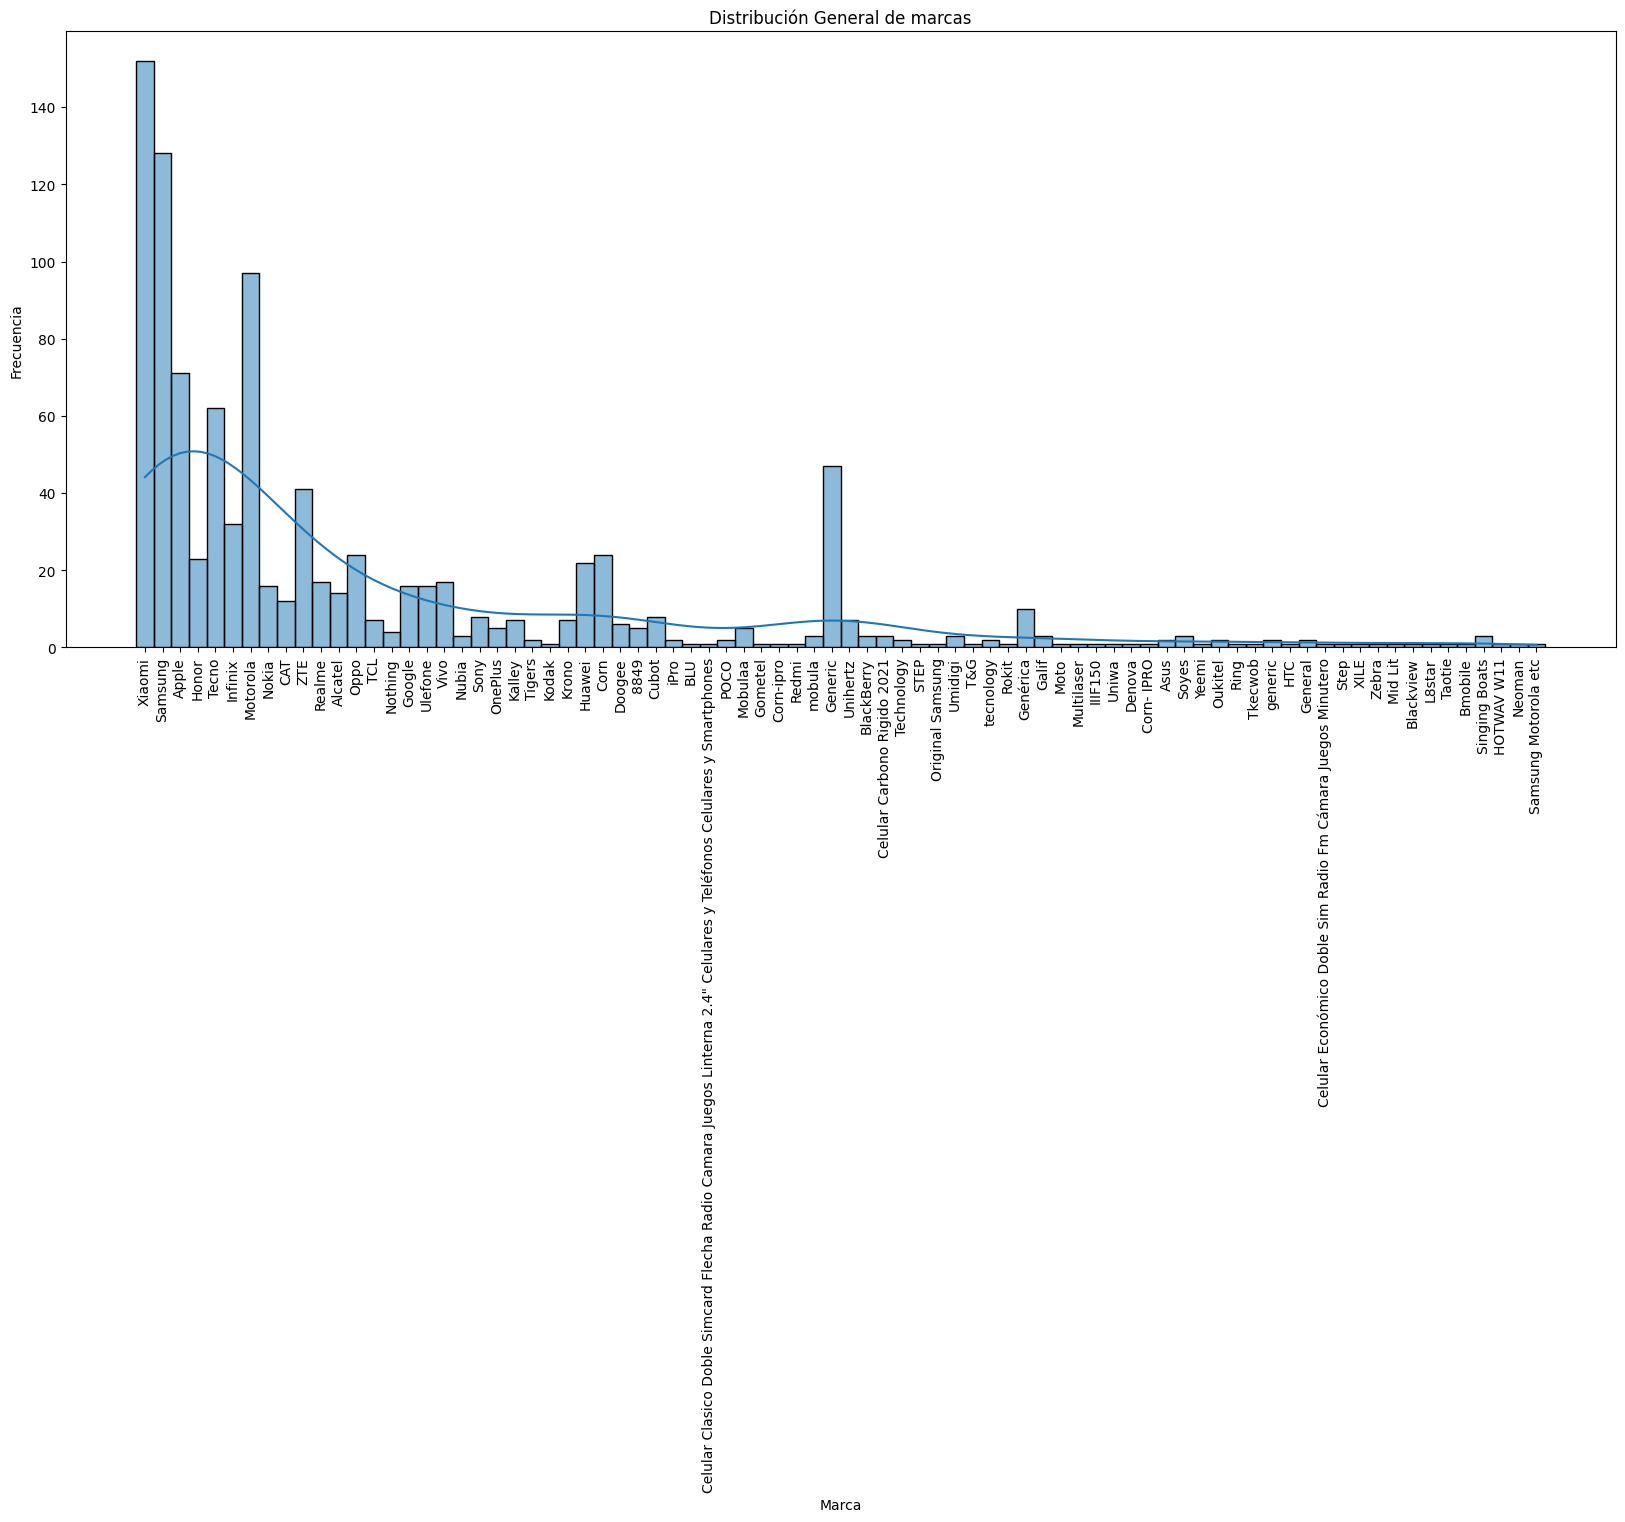

In [70]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['BRAND'], bins=100, kde=True)
plt.title('Distribución General de marcas')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

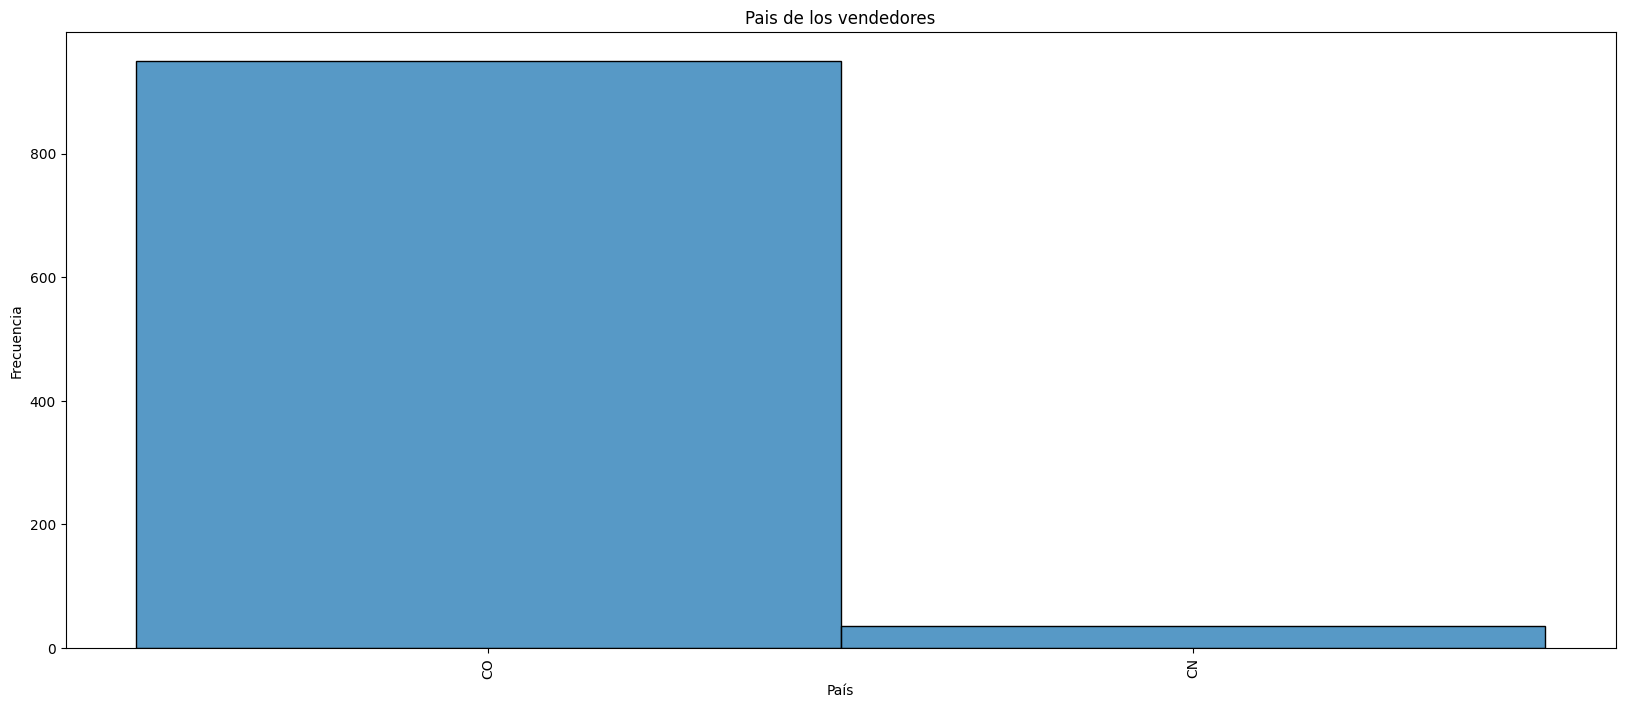

In [71]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['country_id'], bins=10)
plt.title('Pais de los vendedores')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

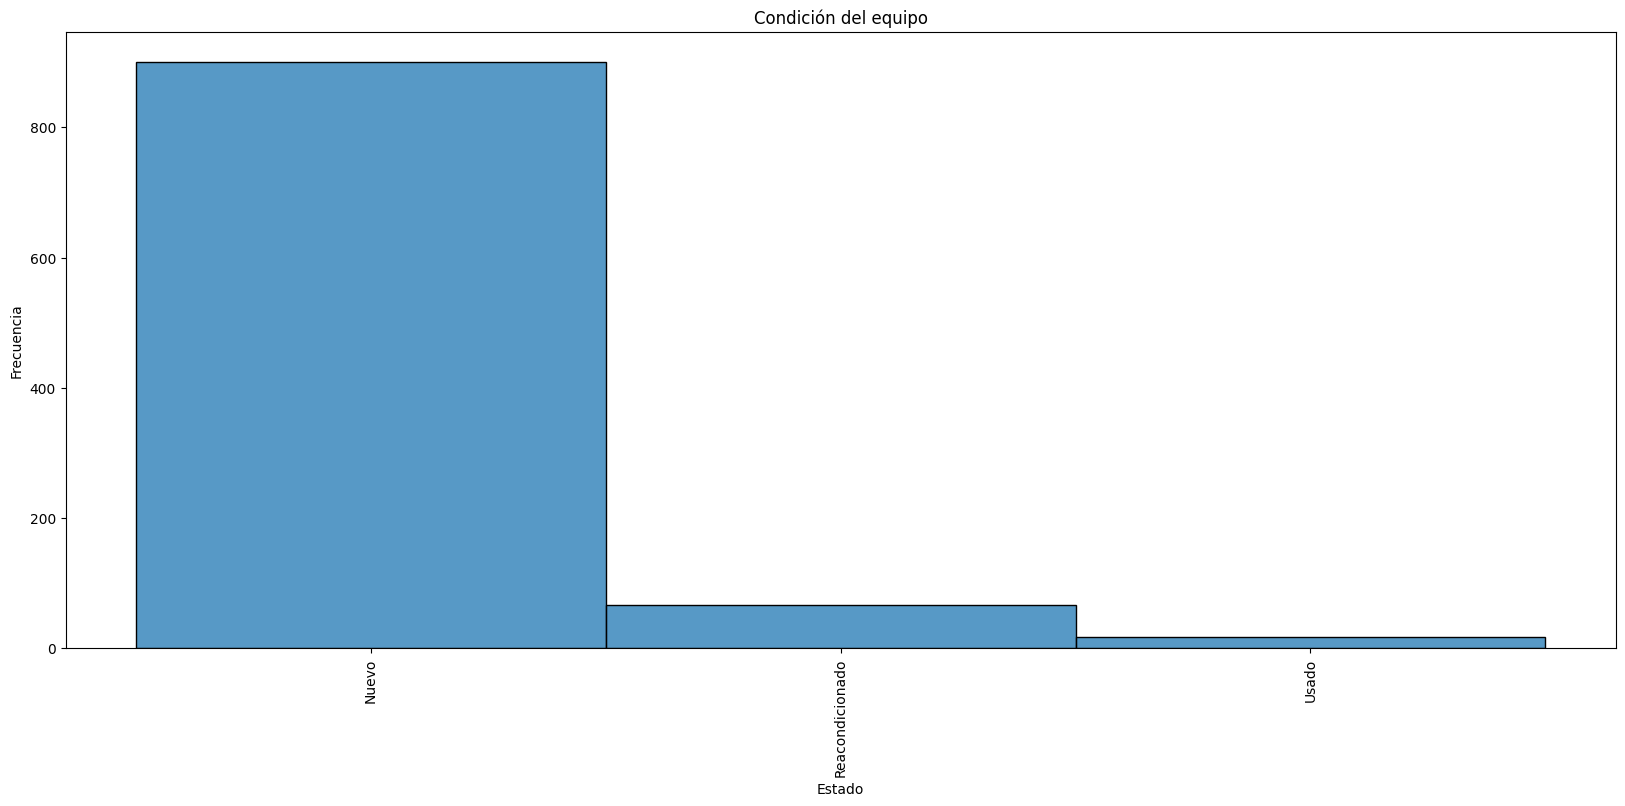

In [72]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['ITEM_CONDITION'], bins=10)
plt.title('Condición del equipo')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

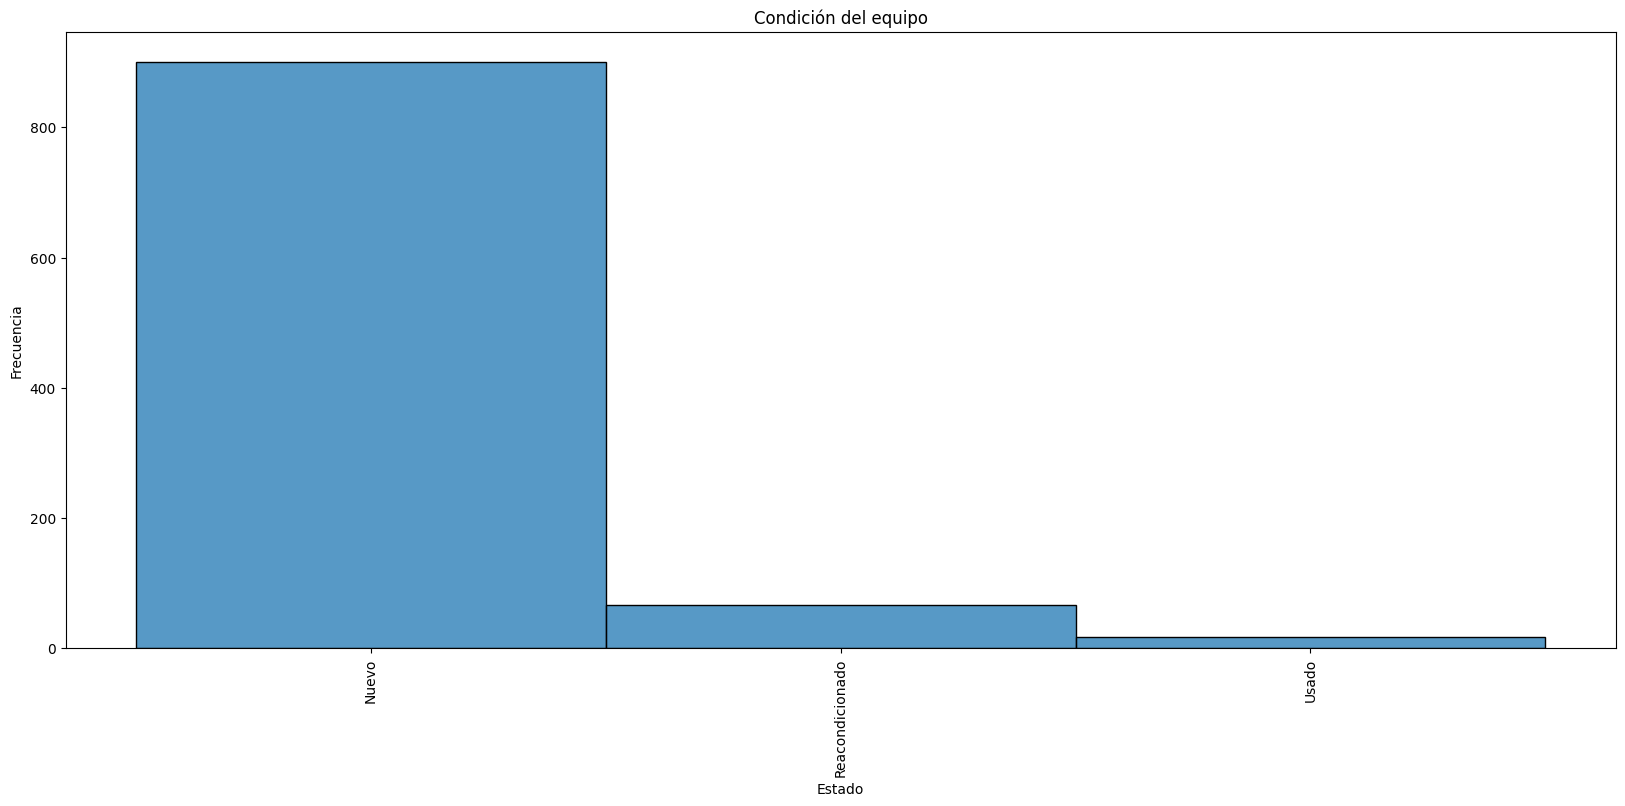

In [73]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['ITEM_CONDITION'], bins=10)
plt.title('Condición del equipo')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

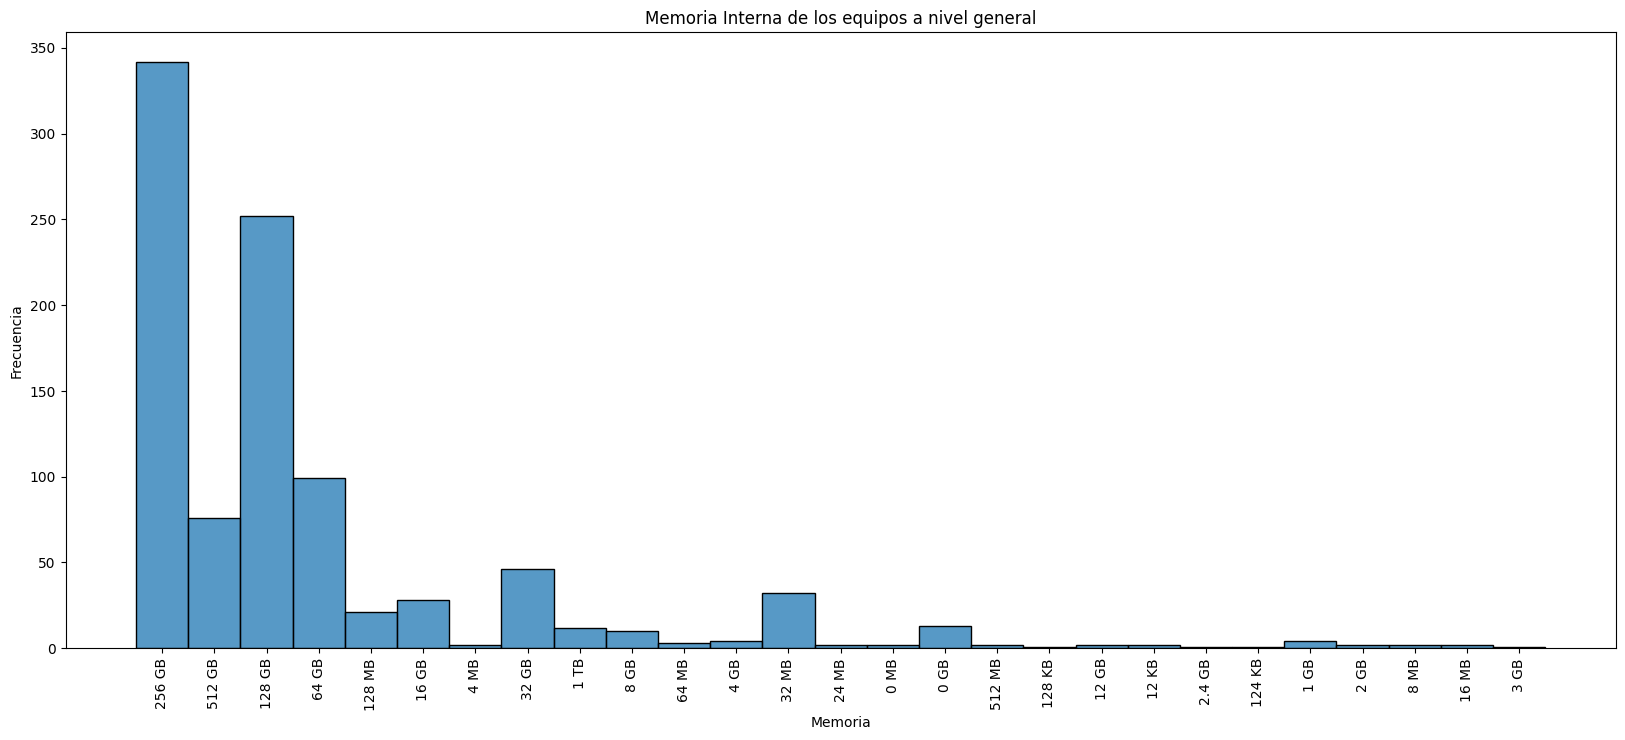

In [74]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['INTERNAL_MEMORY'], bins=10)
plt.title('Memoria Interna de los equipos a nivel general')
plt.xlabel('Memoria')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()


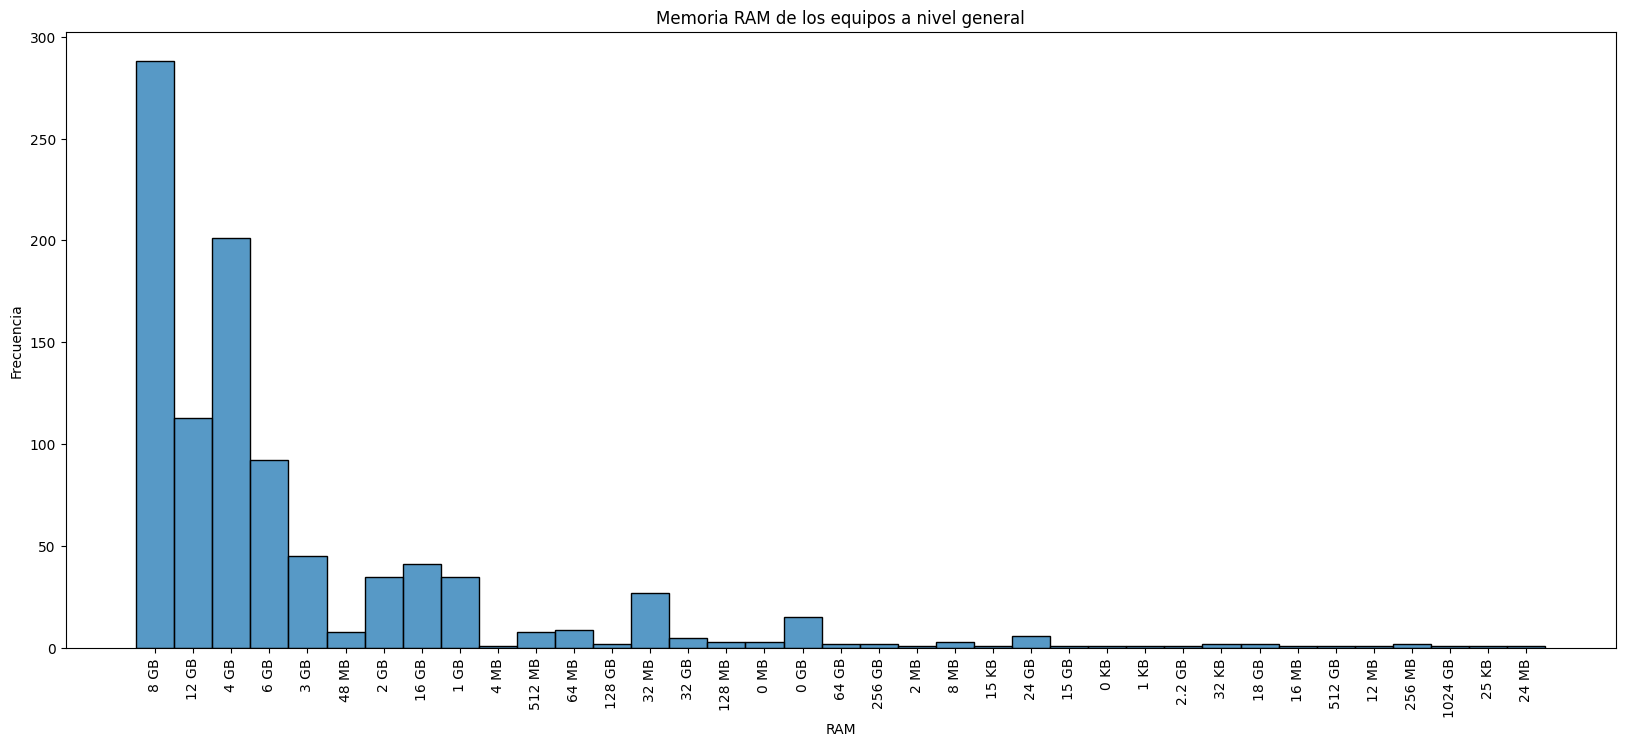

In [75]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['RAM'], bins=1)
plt.title('Memoria RAM de los equipos a nivel general')
plt.xlabel('RAM')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

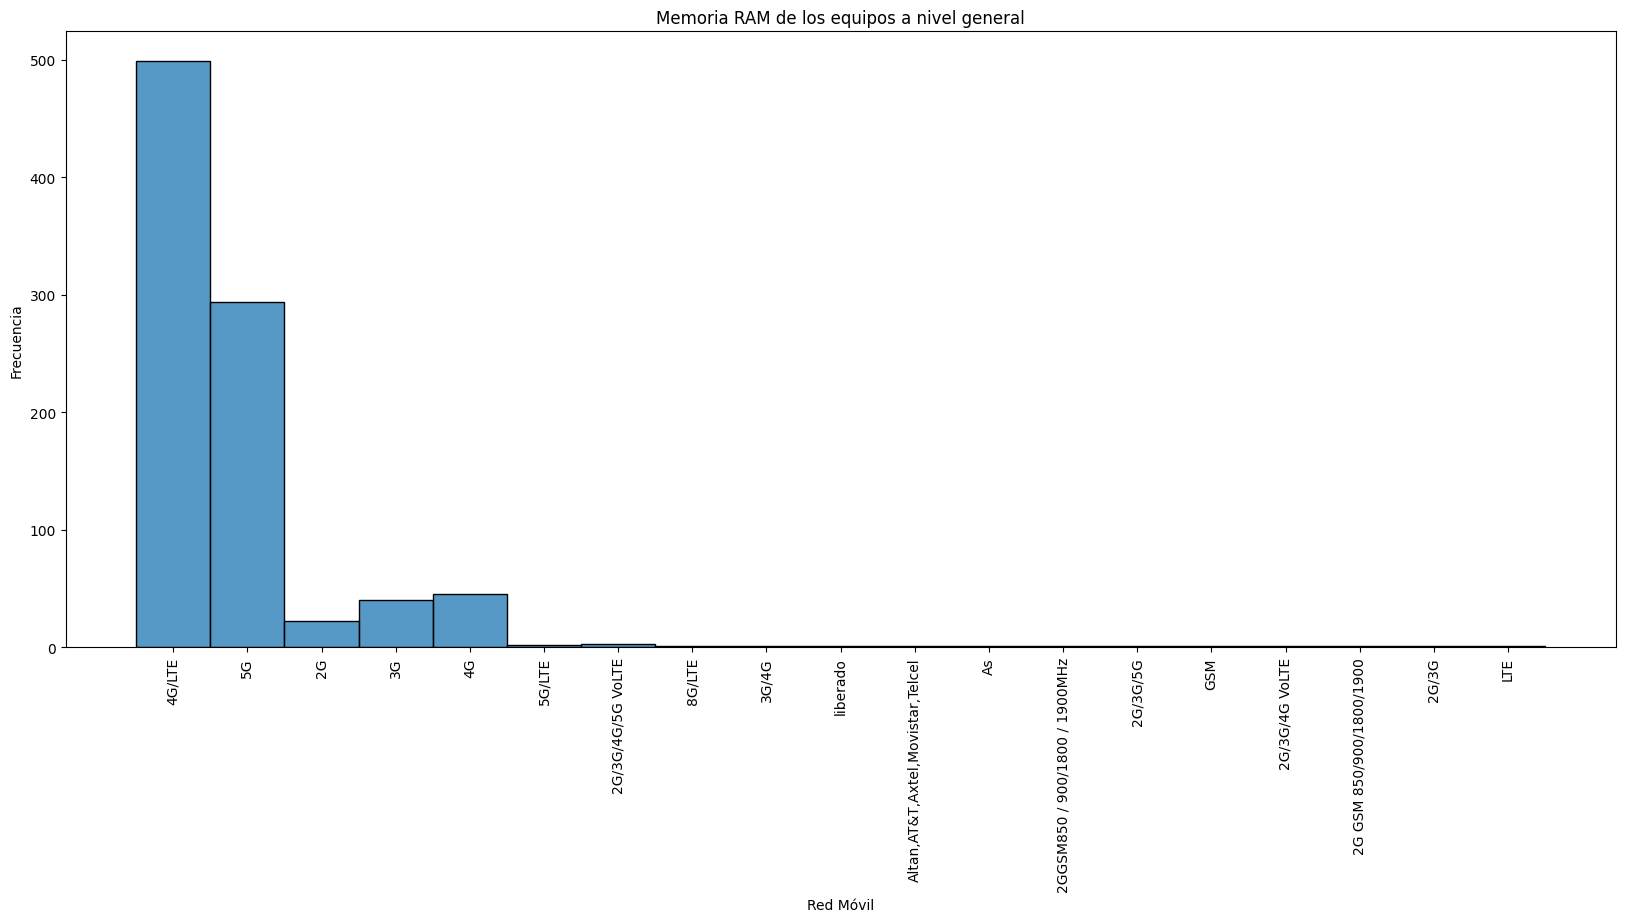

In [76]:
# Análisis univariado de precios a nivel general
plt.figure(figsize=(20, 8))
sns.histplot(completo['MOBILE_NETWORK'], bins=1)
plt.title('Memoria RAM de los equipos a nivel general')
plt.xlabel('Red Móvil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

plt.show()

## Analisis bivariado general
([Volver al Inicio](#Puntos)) | ([Volver al Punto 2](#Punto-2))

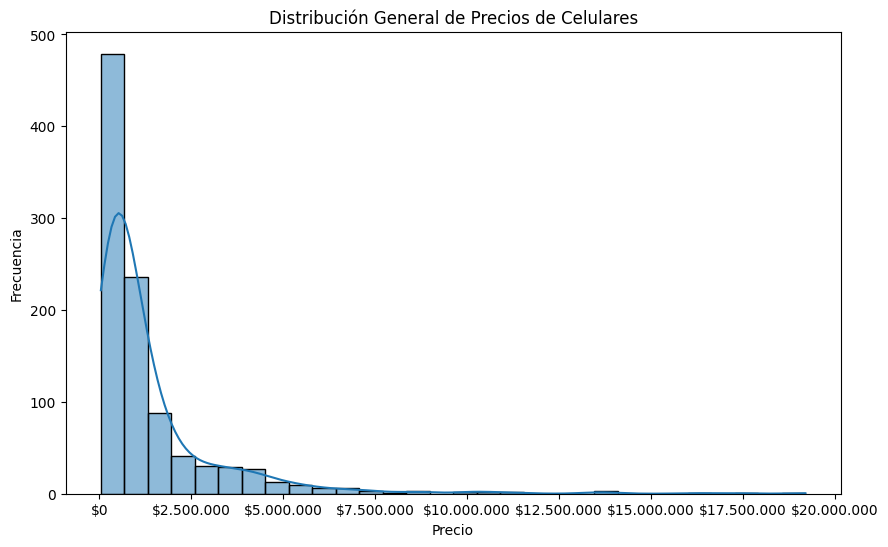

In [78]:
# Análisis univariado
plt.figure(figsize=(10, 6))
sns.histplot(completo['price'], bins=30, kde=True)
plt.title('Distribución General de Precios de Celulares')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'.replace(',', ".")))
plt.show()

### Variables interes
([Volver al Inicio](#Puntos)) | ([Volver al Punto 2](#Punto-2))

In [80]:
completo['memoria_ram_bytes'] = completo['RAM'].apply(convertir_a_bytes)
completo['memoria_interna_bytes'] = completo['INTERNAL_MEMORY'].apply(convertir_a_bytes)

In [81]:
# se realiza el filtro respectivo por las variables de interes
filtro = completo[
                    (completo['price'] <= 1200000) & # PRECIO MAXIMO A CONSIDERAR
                    (completo['ITEM_CONDITION'] == 'Nuevo') & # CONDICION DEL EQUIPO
                    (completo['country_id'] == 'CO') & # UBICACION DEL VENDEDOR
                    (completo['state'] == 'CO-DC') & # UBICACION EN BOGOTA DEL VENDEDOR
                    (completo['memoria_ram_bytes'] >= (6*1024^3))  & # MINIMO DE 6GB DE RAM
                    (completo['memoria_interna_bytes'] >= (128*1024^4)) & # MINIMO 128GB DE ALMACENAMIENTO
                    (completo['MOBILE_NETWORK'].str.contains('5G|4G|LTE', na=False)) # COMPATIBLE CON REDES DE ULTIMA GENERACION
                ]

In [82]:
# dimensiones del DF con los filtros aplicados
filtro.shape

(150, 292)

In [83]:
# FILTRO DE UN ID QUE CUMPLE CON EL FILTRO ANTERIOR
filtro[(filtro['id']=='MCO2047025726')]

,id,sanitized_title,order_backend,sale_price,available_quantity,use_thumbnail_id,shipping_x,stop_time,seller,attributes_x,installments,winner_item_id,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data,seller_id,base_price,initial_quantity,sale_terms,pictures,video_id,descriptions,non_mercado_pago_payment_methods,shipping_y,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes_y,listing_source,variations,status_x,sub_status,tags,warranty,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,ACCESSORIES_INCLUDED,BATTERY_CAPACITY,BRAND,CARRIER,DISPLAY_SIZE,HAZMAT_TRANSPORTABILITY,HEIGHT,INTERNAL_MEMORY,IS_DUAL_SIM,IS_GAMING_CELLPHONE,IS_RUGGED_CELLPHONE,ITEM_CONDITION,LINE,MOBILE_NETWORK,MODEL,OPERATING_SYSTEM_NAME,PROCESSOR_MODEL,PROCESSOR_SPEED,PRODUCT_LIFE,RAM,TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD,WITH_CAMERA,WITH_FACIAL_RECOGNITION,WITH_GPS,WITH_IMEI,WITH_PHYSICAL_QWERTY_KEYBOARD,WITH_RADIO,WITH_TOUCHSCREEN_DISPLAY,WITH_WIFI,ESIMS_NUMBER,SIM_CARD_SLOTS_NUMBER,TELECOMMUNICATION_HOMOLOGATION_NUMBER,CELLPHONES_ANATEL_HOMOLOGATION_NUMBER,CHARGE_CONNECTOR_TYPE,COLOR,DISPLAY_REFRESH_RATE,DISPLAY_RESOLUTION_TYPE,DISPLAY_TECHNOLOGY,GTIN,MAIN_COLOR,MAIN_REAR_CAMERA_RESOLUTION,PROCESSOR_CORES_NUMBER,WITH_3_5_MM_JACK_CONNECTOR,WITH_ACCELEROMETER,WITH_BLUETOOTH,WITH_FAST_CHARGING,WITH_FINGERPRINT_READER,WITH_FRONT_CAMERA_FLASH,WITH_MEMORY_CARD_SLOT,WITH_PROXIMITY_SENSOR,WITH_USB_CONNECTOR,SELLER_SKU,BATTERY_TYPE,COMPATIBLE_SIM_CARD_SIZES,DEPTH,DISPLAY_RESOLUTION,INCLUDES_PENCIL,IS_DROP_RESISTANT,IS_DUST_RESISTANT,IS_SPLASH_RESISTANT,IS_WATERPROOF,IS_WATER_RESISTANT,MAIN_FRONT_CAMERA_RESOLUTION,MEMORY_CARD_MAX_CAPACITY,MEMORY_CARD_TYPES,OPERATING_SYSTEM_EDITION,ORIGIN,REAR_CAMERAS_NUMBER,STANDBY_TIME,TALK_TIME,WEIGHT,WIDTH,WITH_ESIM,WITH_FOLDABLE_DISPLAY,WITH_HAND_RECOGNITION,WITH_IRIS_RECOGNITION,WITH_MINI_HDMI,WITH_NFC,WITH_REMOVABLE_BATTERY,WITH_SECONDARY_FOLDED_DISPLAY,WITH_SECONDARY_TOUCHSCREEN_DISPLAY,WITH_TV_TUNER,WITH_WIRELESS_CHARGING,CAMERAS_MAIN_FEATURES,CHARACTERISTICS_LABEL,CPU_MODELS,DISPLAY_ASPECT_RATIO,DISPLAY_PIXELS_PER_INCH,DISPLAY_TYPE,FRONT_CAMERAS_NUMBER,FRONT_CAMERA_APERTURE,FRONT_CAMERA_RECORDING_RESOLUTION,GPU_MODEL,OS_ORIGINAL_VERSION,REAR_CAMERAS_RESOLUTION,REAR_CAMERA_APERTURE,REAR_CAMERA_RECORDING_RESOLUTION,RELEASE_YEAR,WITH_GYROSCOPE,WITH_COMPASS,MAX_DISPLAY_BRIGHTNESS,OS_PERSONALIZATION_ORIGINAL_SHELL,RELEASE_MONTH,VERSIONS,WITH_BAROMETER,DIGITAL_ZOOM,IP_RATING,OPTICAL_ZOOM,OS_LAST_COMPATIBLE_VERSION,WITH_POSITIVE_IMPACT,ALBUM_NAME,ALBUM_TYPE,ARTIST_NAME,FORMAT,GENRE,PRODUCTION_COMPANY,FRONT_CAMERAS_RESOLUTION,MANUFACTURER,MPN,WITH_HEART_RATE_SENSOR,HYBRID_ZOOM,MAX_SECONDARY_DISPLAY_BRIGHTNESS,SECONDARY_DISPLAY_PIXELS_PER_INCH,SECONDARY_DISPLAY_REFRESH_RATE,SECONDARY_DISPLAY_RESOLUTION,SECONDARY_DISPLAY_SIZE,ANATEL_HOMOLOGATION_NUMBER,FRONT_CAMERAS_TYPES,GPU_SPEED,WITH_SOS_BUTTON,EMPTY_GTIN_REASON,WIDE_ANGLE_CAMERA_RESOLUTION,REAR_CAMERAS_TYPES,ADDITIONAL_INFO_REQUIRED,OS_PERSONALIZATION_LAST_COMPATIBLE_SHELL,PACKAGE_HEIGHT,PACKAGE_LENGTH,PACKAGE_WEIGHT,PACKAGE_WIDTH,PRODUCT_FEATURES,SHIPMENT_PACKING,IS_KIT,DETAILED_MODEL,BATTERY_LIFE,BEZEL_COLOR,CASE_COLOR,IS_INFANT,IS_SMARTBAND,IS_SUITABLE_FOR_APPLICATIONS,LANGUAGES,MAX_RESOLUTION,MAX_WATER_RESISTANCE_DEPTH,OS_NAMES,ROM_MEMORY,SENSORS,SMARTWATCH_CASE_MATERIAL,SMARTWATCH_COMPATIBLE_OS,SMARTWATCH_FUNCTIONS,SMARTWATCH_VERSION,WATER_AND_DUST_RESISTANCE_CLASSIFICATION,WITH_INTEGRATED_MAPS,WITH_INTERCHANGEABLE_WRISTBAND,WITH_MICROPHONE,WITH_MOBILE_NETWORK,WITH_ROTATING_BEZEL,WITH_SIM_CARD_SLOT,WITH_SOUND_REPRODUCTION,WITH_USB,WITH_VIDEO_REPRODUCTION,WRISTBAND_COLOR,WRISTBAND_DESIGN,WRISTBAND_SIZE,WRISTBAND_TYPE,WRISTBAND_WIDTH,ALPHANUMERIC_MODELS,CLOSED_DEPTH,CLOSED_HEIGHT,CLOSED_WIDTH,SECONDARY_DISPLAY_TECHNOLOGY,SECONDARY_FOLDED_DISPLAY_SIZE,ELECTRICAL_SAFETY_CERTIFICATE_NUMBER,OCP_CERTIFICATION_AGENCY,FOLDED_DISPLAY_PIXELS_PER_INCH,MANU

### Analisis bivariado
([Volver al Inicio](#Puntos)) | ([Volver al Punto 2](#Punto-2))

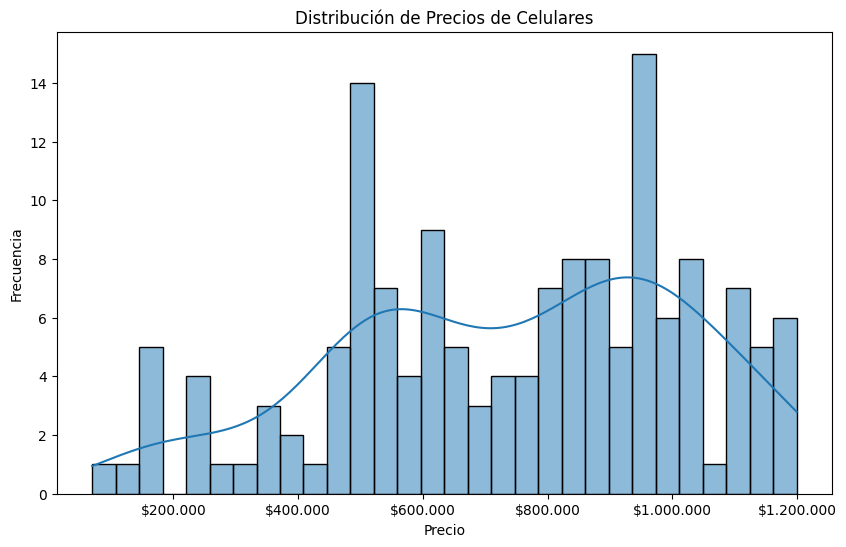

In [85]:
# Análisis univariado
plt.figure(figsize=(10, 6))
sns.histplot(filtro['price'], bins=30, kde=True)
plt.title('Distribución de Precios de Celulares')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'.replace(',', ".")))
plt.show()

Se evidencia una variacion de precios de celulares con precios inferiores al COP\\$ 1.200.000 , y una cantidad significativa de unidades entre los rangos de precios superiores a los COP\\$ 500.000 aprox al COP\\$ 1.000.000

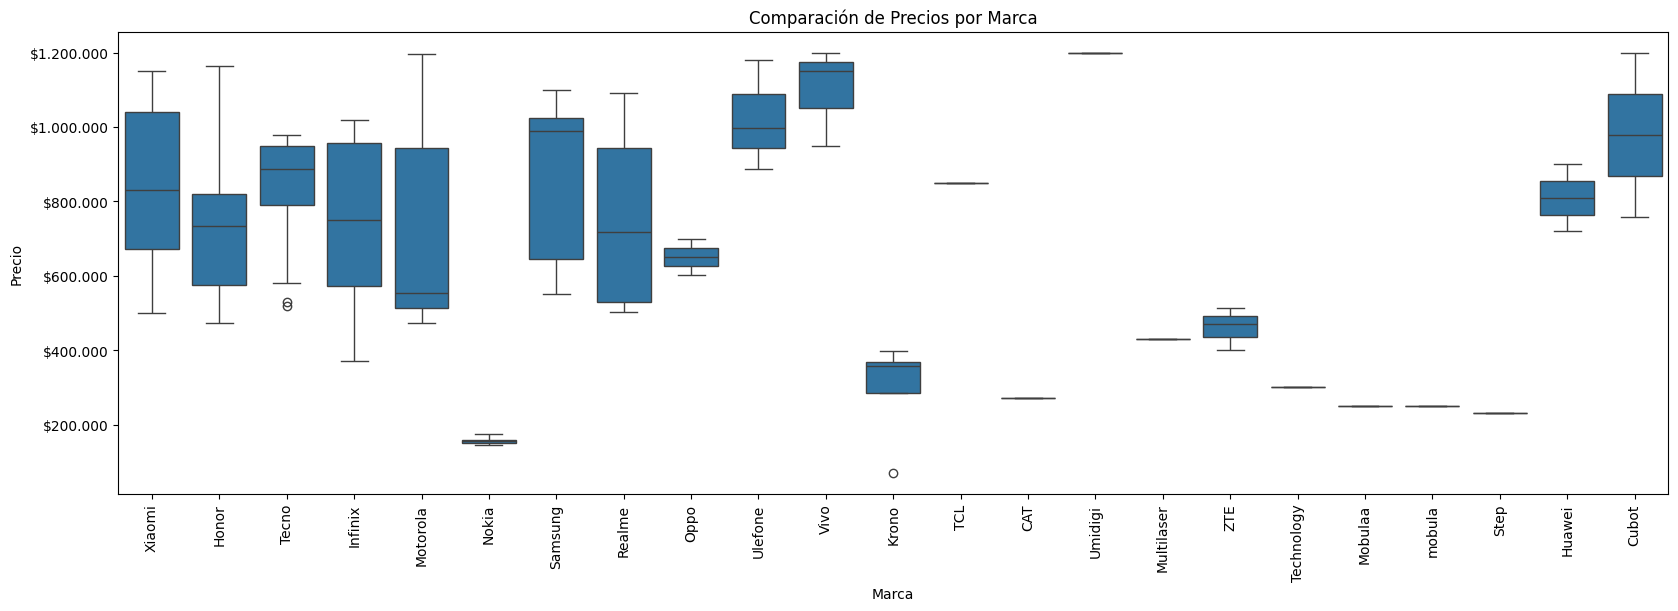

In [87]:
# Análisis bivariado
plt.figure(figsize=(20, 6))
sns.boxplot(data=filtro, x='BRAND', y='price')
plt.title('Comparación de Precios por Marca')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'.replace(',', ".")))
plt.show()

In [88]:
# Marcas
marcas = filtro['BRAND'].value_counts().sort_values(ascending=False)
marcas

BRAND
Tecno         31
Xiaomi        29
Motorola      26
Honor         10
Infinix        8
Samsung        8
Nokia          6
Krono          4
Realme         4
Vivo           3
ZTE            3
Ulefone        3
Oppo           2
mobula         2
Huawei         2
Cubot          2
TCL            1
CAT            1
Umidigi        1
Multilaser     1
Technology     1
Mobulaa        1
Step           1
Name: count, dtype: int64

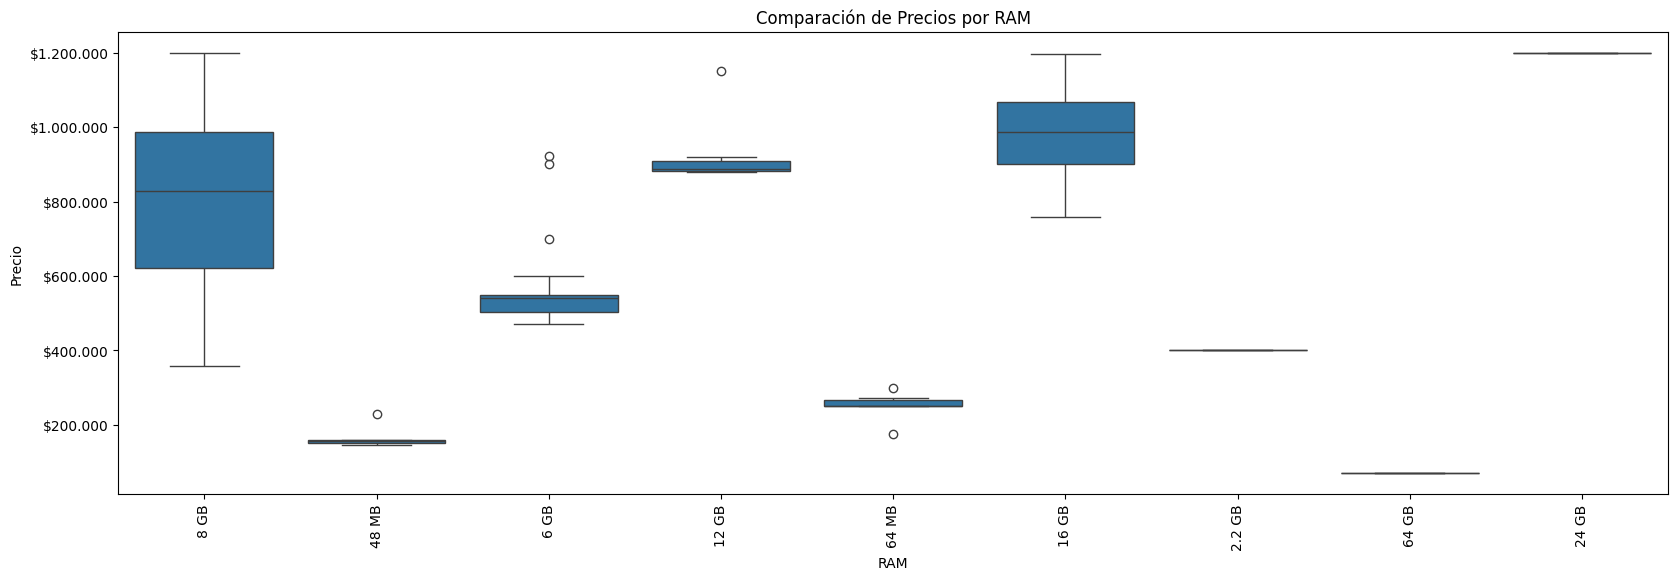

In [89]:
# Análisis bivariado
plt.figure(figsize=(20, 6))
sns.boxplot(data=filtro, x='RAM', y='price')
plt.title('Comparación de Precios por RAM')
plt.xlabel('RAM')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'.replace(',', ".")))
plt.show()

El anterior boxplot, evidencia que varios de los datos se encuentran distribuidos por memoria RAM de 8 GB y sus rangos de precios se concentran más entre los 600.000 y el 1.000.000

In [91]:
# Marcas
conteo_ram = filtro.groupby('RAM')['memoria_ram_bytes'].count().reset_index()
conteo_ram.rename(columns={'memoria_ram_bytes': 'Cantidad'}, inplace=True)
conteo_ram_ordenado = conteo_ram.sort_values(by='Cantidad', ascending=False)
conteo_ram_ordenado

,RAM,Cantidad
8,8 GB,104
5,6 GB,17
0,12 GB,10
4,48 MB,6
7,64 MB,6
1,16 GB,4
2,2.2 GB,1
3,24 GB,1
6,64 GB,1


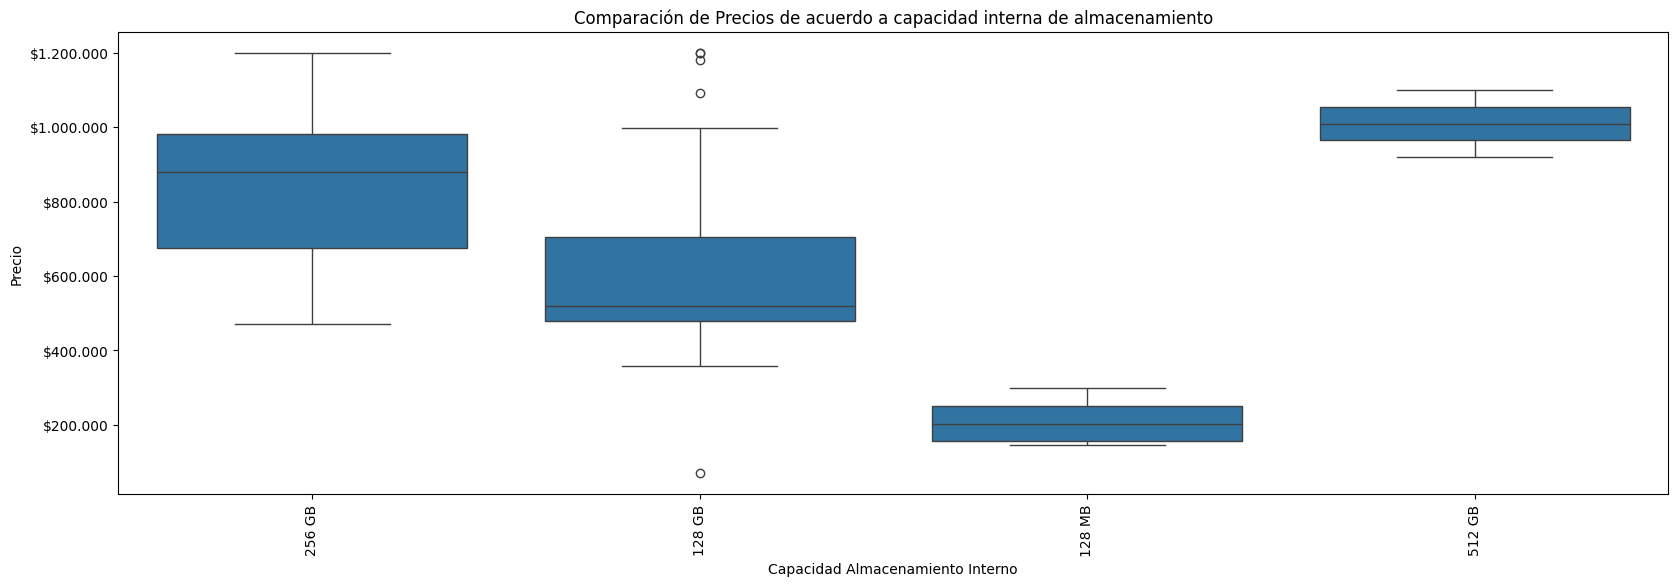

In [92]:
# Análisis bivariado
plt.figure(figsize=(20, 6))
sns.boxplot(data=filtro, x='INTERNAL_MEMORY', y='price')
plt.title('Comparación de Precios de acuerdo a capacidad interna de almacenamiento')
plt.xlabel('Capacidad Almacenamiento Interno')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'.replace(',', ".")))
plt.show()

In [93]:
# Marcas
conteo_ram = filtro.groupby('INTERNAL_MEMORY')['memoria_interna_bytes'].count().reset_index()
conteo_ram.rename(columns={'memoria_interna_bytes': 'Cantidad'}, inplace=True)
conteo_ram_ordenado = conteo_ram.sort_values(by='Cantidad', ascending=False)
conteo_ram_ordenado

,INTERNAL_MEMORY,Cantidad
2,256 GB,100
0,128 GB,36
1,128 MB,12
3,512 GB,2
